# IMPORTING DATA

In [1]:
import csv
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport #https://pandas-profiling.github.io/pandas-profiling/docs/master/index.html
#import qgrid

import pingouin as pg
import scipy
from pca import pca #pip install pca https://github.com/erdogant/pca

import ast #Tranfromer un dictioner
import time

/home/chispitas/anaconda3/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.12, the latest is 0.5.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
#from pca import pca #pip install pca https://github.com/erdogant/pca
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import joblib

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder # Low dimention

In [4]:
import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from scipy.stats import randint

In [6]:
dirDATA = '/media/chispitas/DATOS/Documento/Estudios/DataScientist/Projecto/P6-Classifiez automatiquement des biens de consommation/Git/DATA/'
dfDATA = pd.read_csv(dirDATA + 'flipkart_com-ecommerce_sample_1050.csv', encoding='utf-8').convert_dtypes() #, delimiter='\t''
dfDATA.shape

(1050, 15)

In [7]:
dfDATA.dtypes

uniq_id                     string
crawl_timestamp             string
product_url                 string
product_name                string
product_category_tree       string
pid                         string
retail_price                 Int64
discounted_price             Int64
image                       string
is_FK_Advantage_product    boolean
description                 string
product_rating              string
overall_rating              string
brand                       string
product_specifications      string
dtype: object

#pandas_profiling
#profile = ProfileReport(eval(d), title=d, minimal=False)
profile = ProfileReport(dfDATA, title='dfDATA', explorative=True)
d = "dfDATA_1_deep.html"
profile.to_file(d)

## STYLE Graph

In [8]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None) #Montrer toutes les colonnes

#using the style 
plt.style.use('seaborn-ticks')
plt.style.use('seaborn-notebook') 
plt.style.use('seaborn-poster') 
plt.rcParams["figure.figsize"] = [10,8]

#Width
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['figure.titleweight'] = 'bold'
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'

#Legend
#plt.rcParams['legend.loc'] = 'center left'
plt.rcParams['legend.fontsize'] = 'medium'
plt.rcParams['legend.frameon'] = True
plt.rcParams['legend.edgecolor'] = 'black'
plt.rcParams['legend.facecolor'] = 'w'
plt.rcParams['legend.markerscale'] = 3

#Scatter marker
plt.rcParams['scatter.marker'] = '.'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'

# DATA PREPARATION

## DATA cleaning

### Set index

In [9]:
dfDATA_Clean = dfDATA.copy()
dfDATA_Clean = dfDATA_Clean.set_index('uniq_id')
dfDATA_Clean

crawl_timestamp  \
uniq_id                                                       
55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   
...                                                     ...   
958f54f4c46b53c8a0a9b8167d9140bc  2015-12-01 10:15:43 +0000   
fd6cbcc22efb6b761bd564c28928483c  2015-12-01 10:15:43 +0000   
5912e037d12774bb73a2048f35a00009  2015-12-01 10:15:43 +0000   
c3edc504d1b4f0ba6224fa53a43a7ad6  2015-12-01 10:15:43 +0000   
f2f027ad6a6df617c9f125173da71e44  2015-12-01 10:15:43 +0000   

                                                                        product_url  \
uniq_id                                                                               
55b85ea15a1536d46b7190ad6fff8ce7  http://www.flipkart.com/elegance-polyester-mul...   
7b72c92c2f6c40268628ec5f14c6d590  http://www.flipkart.com/sathiyas-cotton-bath-t...   
64d5d4a258243731dc7bbb1eef49ad74  http://www.flipkart.com/eurospa-cotton-terry-f...   
d4684dcdc759dd9cdf41504698d737d8  http://www.flipkart.com/santosh-royal-fashion-...   
6325b6870c54cd47be6ebfbffa620ec7  http://www.flipkart.com/jaipur-print-cotton-fl...   
...                                                                             ...   
958f54f4c46b53c8a0a9b8167d9140bc  http://www.flipkart.com/oren-empower-extra-lar...   
fd6cbcc22efb6b761bd564c28928483c  http://www.flipkart.com/wallmantra-large-vinyl...   
5912e037d12774bb73a2048f35a00009  http://www.flipkart.com/uberlyfe-extra-large-p...   
c3edc504d1b4f0ba6224fa53a43a7ad6  http://www.flipkart.com/wallmantra-medium-viny...   
f2f027ad6a6df617c9f125173da71e44  http://www.flipkart.com/uberlyfe-large-vinyl-s...   

                                                                       product_name  \
uniq_id                                                                               
55b85ea15a1536d46b7190ad6fff8ce7  Elegance Polyester Multicolor Abstract Eyelet ...   
7b72c92c2f6c40268628ec5f14c6d590                         Sathiyas Cotton Bath Towel   
64d5d4a258243731dc7bbb1eef49ad74                Eurospa Cotton Terry Face Towel Set   
d4684dcdc759dd9cdf41504698d737d8  SANTOSH ROYAL FASHION Cotton Printed King size...   
6325b6870c54cd47be6ebfbffa620ec7  Jaipur Print Cotton Floral King sized Double B...   
...                                                                             ...   
958f54f4c46b53c8a0a9b8167d9140bc     Oren Empower Extra Large Self Adhesive Sticker   
fd6cbcc22efb6b761bd564c28928483c             Wallmantra Large Vinyl Sticker Sticker   
5912e037d12774bb73a2048f35a00009  Uberlyfe Extra Large Pigmented Polyvinyl Films...   
c3edc504d1b4f0ba6224fa53a43a7ad6            Wallmantra Medium Vinyl Sticker Sticker   
f2f027ad6a6df617c9f125173da71e44                       Uberlyfe Large Vinyl Sticker   

                                                              product_category_tree  \
uniq_id                                                                               
55b85ea15a1536d46b7190ad6fff8ce7  ["Home Furnishing >> Curtains & Accessories >>...   
7b72c92c2f6c40268628ec5f14c6d590  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...   
64d5d4a258243731dc7bbb1eef49ad74  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...   
d4684dcdc759dd9cdf41504698d737d8  ["Home Furnishing >> Bed Linen >> Bedsheets >>...   
6325b6870c54cd47be6ebfbffa620ec7  ["Home Furnishing >> Bed Linen >> Bedsheets >>...   
...                                                                             ...   
958f54f4c46b53c8a0a9b8167d9140bc  ["Baby Care >> Baby & Kids Gifts >> Stickers >...   
fd6cbcc22efb6b761bd564c28928483c  ["Baby Care >> Baby & Kids Gifts >> Stickers >...   
5912e037d12774bb73a2048f35a00009  ["Baby Care >> Baby & Kids Gifts >> Stickers >...   
c3e

### Lowercase

In [10]:
dfDATA_Clean.columns = dfDATA_Clean.columns.str.lower().str.strip(' ').str.replace(' ', '_').str.replace('(', '_').str.replace(')', '').str.replace('[', '').str.replace(']', '').str.replace('"', '').to_list()
dfDATA_Clean.head(3)

/tmp/ipykernel_29300/504327933.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dfDATA_Clean.columns = dfDATA_Clean.columns.str.lower().str.strip(' ').str.replace(' ', '_').str.replace('(', '_').str.replace(')', '').str.replace('[', '').str.replace(']', '').str.replace('"', '').to_list()


crawl_timestamp  \
uniq_id                                                       
55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   

                                                                        product_url  \
uniq_id                                                                               
55b85ea15a1536d46b7190ad6fff8ce7  http://www.flipkart.com/elegance-polyester-mul...   
7b72c92c2f6c40268628ec5f14c6d590  http://www.flipkart.com/sathiyas-cotton-bath-t...   
64d5d4a258243731dc7bbb1eef49ad74  http://www.flipkart.com/eurospa-cotton-terry-f...   

                                                                       product_name  \
uniq_id                                                                               
55b85ea15a1536d46b7190ad6fff8ce7  Elegance Polyester Multicolor Abstract Eyelet ...   
7b72c92c2f6c40268628ec5f14c6d590                         Sathiyas Cotton Bath Towel   
64d5d4a258243731dc7bbb1eef49ad74                Eurospa Cotton Terry Face Towel Set   

                                                              product_category_tree  \
uniq_id                                                                               
55b85ea15a1536d46b7190ad6fff8ce7  ["Home Furnishing >> Curtains & Accessories >>...   
7b72c92c2f6c40268628ec5f14c6d590  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...   
64d5d4a258243731dc7bbb1eef49ad74  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...   

                                               pid  retail_price  \
uniq_id                                                            
55b85ea15a1536d46b7190ad6fff8ce7  CRNEG7BKMFFYHQ8Z          1899   
7b72c92c2f6c40268628ec5f14c6d590  BTWEGFZHGBXPHZUH           600   
64d5d4a258243731dc7bbb1eef49ad74  BTWEG6SHXTDB2A2Y          <NA>   

                                  discounted_price  \
uniq_id                                              
55b85ea15a1536d46b7190ad6fff8ce7               899   
7b72c92c2f6c40268628ec5f14c6d590               449   
64d5d4a258243731dc7bbb1eef49ad74              <NA>   

                                                                 image  \
uniq_id                                                                  
55b85ea15a1536d46b7190ad6fff8ce7  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
7b72c92c2f6c40268628ec5f14c6d590  7b72c92c2f6c40268628ec5f14c6d590.jpg   
64d5d4a258243731dc7bbb1eef49ad74  64d5d4a258243731dc7bbb1eef49ad74.jpg   

                                  is_fk_advantage_product  \
uniq_id                                                     
55b85ea15a1536d46b7190ad6fff8ce7                    False   
7b72c92c2f6c40268628ec5f14c6d590                    False   
64d5d4a258243731dc7bbb1eef49ad74                    False   

                                                                        description  \
uniq_id                                                                               
55b85ea15a1536d46b7190ad6fff8ce7  Key Features of Elegance Polyester Multicolor ...   
7b72c92c2f6c40268628ec5f14c6d590  Specifications of Sathiyas Cotton Bath Towel (...   
64d5d4a258243731dc7bbb1eef49ad74  Key Features of Eurospa Cotton Terry Face Towe...   

                                       product_rating       overall_rating  \
uniq_id                                                                      
55b85ea15a1536d46b7190ad6fff8ce7  No rating available  No rating available   
7b72c92c2f6c40268628ec5f14c6d590  No rating available  No rating available   
64d5d4a258243731dc7bbb1eef49ad74  No rating available  No rating available   

                                     brand  \
uniq_id                                      
55b85ea15a1536d46b7190ad6fff8ce7  Elegance   
7b72c92c2f6c40268628ec5f14c6d590  Sathiyas   
64d5d4a258243731dc7bbb1eef49ad74   Eurospa   

                                                             product_spec

In [11]:
def lowercases(df):
    for c in df.select_dtypes(exclude=[np.number, 'datetime', 'timedelta']).columns:
        print(c)
        df[c] = df[c].str.lower().str.replace('(', '_').str.replace(')', '_').str.replace('[', '').str.replace(']', '').str.replace('"', '')

    return df

In [12]:
dfDATA_Clean = lowercases(dfDATA_Clean[dfDATA_Clean.columns.difference([''])])
dfDATA_Clean.head(3)

brand
crawl_timestamp
description
image
overall_rating
pid
product_category_tree
product_name
product_rating
product_specifications
product_url


/tmp/ipykernel_29300/546991685.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[c] = df[c].str.lower().str.replace('(', '_').str.replace(')', '_').str.replace('[', '').str.replace(']', '').str.replace('"', '')


brand            crawl_timestamp  \
uniq_id                                                                 
55b85ea15a1536d46b7190ad6fff8ce7  elegance  2016-04-30 03:22:56 +0000   
7b72c92c2f6c40268628ec5f14c6d590  sathiyas  2016-04-30 03:22:56 +0000   
64d5d4a258243731dc7bbb1eef49ad74   eurospa  2016-04-30 03:22:56 +0000   

                                                                        description  \
uniq_id                                                                               
55b85ea15a1536d46b7190ad6fff8ce7  key features of elegance polyester multicolor ...   
7b72c92c2f6c40268628ec5f14c6d590  specifications of sathiyas cotton bath towel _...   
64d5d4a258243731dc7bbb1eef49ad74  key features of eurospa cotton terry face towe...   

                                  discounted_price  \
uniq_id                                              
55b85ea15a1536d46b7190ad6fff8ce7               899   
7b72c92c2f6c40268628ec5f14c6d590               449   
64d5d4a258243731dc7bbb1eef49ad74              <NA>   

                                                                 image  \
uniq_id                                                                  
55b85ea15a1536d46b7190ad6fff8ce7  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
7b72c92c2f6c40268628ec5f14c6d590  7b72c92c2f6c40268628ec5f14c6d590.jpg   
64d5d4a258243731dc7bbb1eef49ad74  64d5d4a258243731dc7bbb1eef49ad74.jpg   

                                  is_fk_advantage_product  \
uniq_id                                                     
55b85ea15a1536d46b7190ad6fff8ce7                    False   
7b72c92c2f6c40268628ec5f14c6d590                    False   
64d5d4a258243731dc7bbb1eef49ad74                    False   

                                       overall_rating               pid  \
uniq_id                                                                   
55b85ea15a1536d46b7190ad6fff8ce7  no rating available  crneg7bkmffyhq8z   
7b72c92c2f6c40268628ec5f14c6d590  no rating available  btwegfzhgbxphzuh   
64d5d4a258243731dc7bbb1eef49ad74  no rating available  btweg6shxtdb2a2y   

                                                              product_category_tree  \
uniq_id                                                                               
55b85ea15a1536d46b7190ad6fff8ce7  home furnishing >> curtains & accessories >> c...   
7b72c92c2f6c40268628ec5f14c6d590  baby care >> baby bath & skin >> baby bath tow...   
64d5d4a258243731dc7bbb1eef49ad74  baby care >> baby bath & skin >> baby bath tow...   

                                                                       product_name  \
uniq_id                                                                               
55b85ea15a1536d46b7190ad6fff8ce7  elegance polyester multicolor abstract eyelet ...   
7b72c92c2f6c40268628ec5f14c6d590                         sathiyas cotton bath towel   
64d5d4a258243731dc7bbb1eef49ad74                eurospa cotton terry face towel set   

                                       product_rating  \
uniq_id                                                 
55b85ea15a1536d46b7190ad6fff8ce7  no rating available   
7b72c92c2f6c40268628ec5f14c6d590  no rating available   
64d5d4a258243731dc7bbb1eef49ad74  no rating available   

                                                             product_specifications  \
uniq_id                                                                               
55b85ea15a1536d46b7190ad6fff8ce7  {product_specification=>{key=>brand, value=>el...   
7b72c92c2f6c40268628ec5f14c6d590  {product_specification=>{key=>machine washable...   
64d5d4a258243731dc7bbb1eef49ad74  {product_specification=>{key=>material, value=...   

                                                                        product_url  \
uniq_id                                                                               
55b85ea15a1536d46b7190ad6fff8ce7  http://www.flipkart.com/elegance-polyester-mul...   
7b72c92c2f6c40268628ec5f14c6d590  http://www.flipkart.co

### Column split : product_category_tree

In [13]:
lproduct_category = ['product_category_tree_' + str(i) for i in range(0,7)]
dfDATA_Clean[lproduct_category] = dfDATA_Clean['product_category_tree'].str.split(' >> ', n=30, expand=True)
dfDATA_Clean = dfDATA_Clean.drop(['product_category_tree'], axis=1)
dfDATA_Clean.head(3)

brand            crawl_timestamp  \
uniq_id                                                                 
55b85ea15a1536d46b7190ad6fff8ce7  elegance  2016-04-30 03:22:56 +0000   
7b72c92c2f6c40268628ec5f14c6d590  sathiyas  2016-04-30 03:22:56 +0000   
64d5d4a258243731dc7bbb1eef49ad74   eurospa  2016-04-30 03:22:56 +0000   

                                                                        description  \
uniq_id                                                                               
55b85ea15a1536d46b7190ad6fff8ce7  key features of elegance polyester multicolor ...   
7b72c92c2f6c40268628ec5f14c6d590  specifications of sathiyas cotton bath towel _...   
64d5d4a258243731dc7bbb1eef49ad74  key features of eurospa cotton terry face towe...   

                                  discounted_price  \
uniq_id                                              
55b85ea15a1536d46b7190ad6fff8ce7               899   
7b72c92c2f6c40268628ec5f14c6d590               449   
64d5d4a258243731dc7bbb1eef49ad74              <NA>   

                                                                 image  \
uniq_id                                                                  
55b85ea15a1536d46b7190ad6fff8ce7  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
7b72c92c2f6c40268628ec5f14c6d590  7b72c92c2f6c40268628ec5f14c6d590.jpg   
64d5d4a258243731dc7bbb1eef49ad74  64d5d4a258243731dc7bbb1eef49ad74.jpg   

                                  is_fk_advantage_product  \
uniq_id                                                     
55b85ea15a1536d46b7190ad6fff8ce7                    False   
7b72c92c2f6c40268628ec5f14c6d590                    False   
64d5d4a258243731dc7bbb1eef49ad74                    False   

                                       overall_rating               pid  \
uniq_id                                                                   
55b85ea15a1536d46b7190ad6fff8ce7  no rating available  crneg7bkmffyhq8z   
7b72c92c2f6c40268628ec5f14c6d590  no rating available  btwegfzhgbxphzuh   
64d5d4a258243731dc7bbb1eef49ad74  no rating available  btweg6shxtdb2a2y   

                                                                       product_name  \
uniq_id                                                                               
55b85ea15a1536d46b7190ad6fff8ce7  elegance polyester multicolor abstract eyelet ...   
7b72c92c2f6c40268628ec5f14c6d590                         sathiyas cotton bath towel   
64d5d4a258243731dc7bbb1eef49ad74                eurospa cotton terry face towel set   

                                       product_rating  \
uniq_id                                                 
55b85ea15a1536d46b7190ad6fff8ce7  no rating available   
7b72c92c2f6c40268628ec5f14c6d590  no rating available   
64d5d4a258243731dc7bbb1eef49ad74  no rating available   

                                                             product_specifications  \
uniq_id                                                                               
55b85ea15a1536d46b7190ad6fff8ce7  {product_specification=>{key=>brand, value=>el...   
7b72c92c2f6c40268628ec5f14c6d590  {product_specification=>{key=>machine washable...   
64d5d4a258243731dc7bbb1eef49ad74  {product_specification=>{key=>material, value=...   

                                                                        product_url  \
uniq_id                                                                               
55b85ea15a1536d46b7190ad6fff8ce7  http://www.flipkart.com/elegance-polyester-mul...   
7b72c92c2f6c40268628ec5f14c6d590  http://www.flipkart.com/sathiyas-cotton-bath-t...   
64d5d4a258243731dc7bbb1eef49ad74  http://www.flipkart.com/eurospa-cotton-terry-f...   

                                  retail_price product_category_tree_0  \
uniq_id                                                                  
55b85ea15a1536d46b7190ad6fff8ce7          1899         home furnishing   
7b72c92c2f6c40268628ec5f14c6d590           600               baby care   
64d5d4a258243731dc7bb

### Datatype Format

In [14]:
for c in ['crawl_timestamp']:
    dfDATA_Clean[c] = pd.to_datetime(dfDATA_Clean[c], format='%Y-%m-%d %H:%M:%S %z')
    #df_orders['Year'] = df_orders[c].dt.year
    #df_orders[c+'_M'] = df_orders[c].dt.month

#df_order_reviews = df_order_reviews.convert_dtypes()
dfDATA_Clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1050 entries, 55b85ea15a1536d46b7190ad6fff8ce7 to f2f027ad6a6df617c9f125173da71e44
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   brand                    712 non-null    string             
 1   crawl_timestamp          1050 non-null   datetime64[ns, UTC]
 2   description              1050 non-null   string             
 3   discounted_price         1049 non-null   Int64              
 4   image                    1050 non-null   string             
 5   is_fk_advantage_product  1050 non-null   boolean            
 6   overall_rating           1050 non-null   string             
 7   pid                      1050 non-null   string             
 8   product_name             1050 non-null   string             
 9   product_rating           1050 non-null   string             
 10  product_specifications   1049 non-null   s

In [15]:
dfDATA_Clean['crawl_timestamp']

uniq_id
55b85ea15a1536d46b7190ad6fff8ce7   2016-04-30 03:22:56+00:00
7b72c92c2f6c40268628ec5f14c6d590   2016-04-30 03:22:56+00:00
64d5d4a258243731dc7bbb1eef49ad74   2016-04-30 03:22:56+00:00
d4684dcdc759dd9cdf41504698d737d8   2016-06-20 08:49:52+00:00
6325b6870c54cd47be6ebfbffa620ec7   2016-06-20 08:49:52+00:00
                                              ...           
958f54f4c46b53c8a0a9b8167d9140bc   2015-12-01 10:15:43+00:00
fd6cbcc22efb6b761bd564c28928483c   2015-12-01 10:15:43+00:00
5912e037d12774bb73a2048f35a00009   2015-12-01 10:15:43+00:00
c3edc504d1b4f0ba6224fa53a43a7ad6   2015-12-01 10:15:43+00:00
f2f027ad6a6df617c9f125173da71e44   2015-12-01 10:15:43+00:00
Name: crawl_timestamp, Length: 1050, dtype: datetime64[ns, UTC]

#pandas_profiling
#profile = ProfileReport(eval(d), title=d, minimal=False)
profile = ProfileReport(dfDATA_Clean, title='dfDATA_Clean', explorative=True)
d = "dfDATA_2_deep.html"
profile.to_file(d)

### Errors from data entry

In [16]:
np.sort(np.array(dfDATA_Clean['product_category_tree_1'].unique()))

array(['baby & kids gifts', 'baby bath & skin', 'baby bedding',
       'baby grooming', 'bar & glassware', 'bath and spa', 'bath linen',
       'beauty accessories', 'bed linen', 'body and skin care',
       'candles & fragrances', 'clocks', 'coffee mugs', 'combos and kits',
       'computer components', 'computer peripherals',
       'consumables & disposables', 'containers & bottles', 'cookware',
       'curtains & accessories', 'cushions, pillows & covers',
       'decorative lighting & lamps', 'diapering & potty training',
       'dinnerware & crockery', 'eye care', 'feeding & nursing',
       'floor coverings', 'flowers, plants & vases', 'fragrances',
       'furniture & furnishings', 'garden & leisure', 'hair care',
       'health care', 'housekeeping & laundry', 'infant wear',
       'jmd home furnishing', 'kitchen & dining linen', 'kitchen tools',
       "kripa's home furnishing", 'laptop accessories', 'laptops',
       'lighting', 'living', 'living room furnishing', 'makeup',


In [17]:
dfDATA_Clean['product_category_tree_1'][dfDATA_Clean['product_category_tree_1'] == 'showpiece'] = 'showpieces'

np.sort(np.array(dfDATA_Clean['product_category_tree_1'].unique()))

array(['baby & kids gifts', 'baby bath & skin', 'baby bedding',
       'baby grooming', 'bar & glassware', 'bath and spa', 'bath linen',
       'beauty accessories', 'bed linen', 'body and skin care',
       'candles & fragrances', 'clocks', 'coffee mugs', 'combos and kits',
       'computer components', 'computer peripherals',
       'consumables & disposables', 'containers & bottles', 'cookware',
       'curtains & accessories', 'cushions, pillows & covers',
       'decorative lighting & lamps', 'diapering & potty training',
       'dinnerware & crockery', 'eye care', 'feeding & nursing',
       'floor coverings', 'flowers, plants & vases', 'fragrances',
       'furniture & furnishings', 'garden & leisure', 'hair care',
       'health care', 'housekeeping & laundry', 'infant wear',
       'jmd home furnishing', 'kitchen & dining linen', 'kitchen tools',
       "kripa's home furnishing", 'laptop accessories', 'laptops',
       'lighting', 'living', 'living room furnishing', 'makeup',


#### Duplicate

In [18]:
print(dfDATA_Clean.shape)
dfDATA_Clean = dfDATA_Clean.drop_duplicates()
print(dfDATA_Clean.shape)

(1050, 20)
(1050, 20)


### Physically impossible values

### Missing values

In [19]:
def MissingValues(df):
    dfDESCRIPTION = df.describe(include='all')
    dfTAUX = dfDESCRIPTION.T
    LEN = len(df)
    dfTAUX['%full'] = (dfTAUX['count']/LEN)*100
    dfTAUX['%unique'] = (1-dfTAUX['unique']/dfTAUX['count'])*100
    dfTAUX.drop(['top'], axis=1,inplace = True)
    dfTAUX.sort_values('%full', ascending = True ,inplace = True)
    return dfTAUX

In [20]:
lEXECPT = ['brand', 'product_category_tree_3', 'product_category_tree_4', 'product_category_tree_5', 'product_category_tree_6']
dfDATA_Clean = dfDATA_Clean.dropna(subset=dfDATA_Clean.columns.difference(lEXECPT))
dfDATA_Clean = dfDATA_Clean[dfDATA_Clean['product_rating']=="no rating available"]
dfDATA_Clean = dfDATA_Clean[dfDATA_Clean['overall_rating']=="no rating available"]
dfDATA_Clean = dfDATA_Clean[dfDATA_Clean['is_fk_advantage_product']==False]
#dfDATA_Clean = dfDATA_Clean.drop('product_rating')

In [21]:
df_TAUX2 = MissingValues(dfDATA_Clean.select_dtypes(exclude='datetime'))

/tmp/ipykernel_29300/4131469734.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dfDESCRIPTION = df.describe(include='all')


In [22]:
df_TAUX2.sort_values('%full', ascending = True ,inplace = True)
df_TAUX2.loc[:,['count', 'unique', 'freq', 'mean', 'std', 'min', 'max', '%full', '%unique']].head(60)
df_TAUX2[['count', 'unique', 'freq', 'mean', 'std', 'min', 'max', '%full', '%unique']].style.format('{0:,.1f}').background_gradient(subset=['count', 'unique', 'freq', 'mean', 'std', 'min', 'max', '%full', '%unique'])

### Outliers

### Spaces, typos, ...

### Errorrs against codebook

# Pre-Processing

In [23]:
dfDESCRIPTION = pd.DataFrame(dfDATA_Clean['description']).copy()
dfDESCRIPTION.head()

description
uniq_id                                                                            
55b85ea15a1536d46b7190ad6fff8ce7  key features of elegance polyester multicolor ...
7b72c92c2f6c40268628ec5f14c6d590  specifications of sathiyas cotton bath towel _...
d4684dcdc759dd9cdf41504698d737d8  key features of santosh royal fashion cotton p...
6325b6870c54cd47be6ebfbffa620ec7  key features of jaipur print cotton floral kin...
893aa5ed55f7cff2eccea7758d7a86bd  maserati time r8851116001 analog watch  - for ...

## Text cleaning

### Spelling correction MICROSOFT

import requests
import json

api_key = "<ENTER-KEY-HERE>"
example_text = "Hollo, wrld" # the text to be spell-checked
endpoint = "https://api.cognitive.microsoft.com/bing/v7.0/SpellCheck"

data = {'text': example_text}
params = {
    'mkt':'en-us',
    'mode':'proof'
    }
headers = {
    'Content-Type': 'application/x-www-form-urlencoded',
    'Ocp-Apim-Subscription-Key': api_key,
    }

response = requests.post(endpoint, headers=headers, params=params, data=data)

json_response = response.json()
print(json.dumps(json_response, indent=4))

In [24]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import pandas as pd
import re
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/chispitas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/chispitas/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Data preprocessing pipeline

In [25]:
def text_clean(corpus, keep_list):
    '''
    Purpose : Function to keep only alphabets, digits and certain words (punctuations, qmarks, tabs etc. removed)
    
    Input : Takes a text corpus, 'corpus' to be cleaned along with a list of words, 'keep_list', which have to be retained
            even after the cleaning process
    
    Output : Returns the cleaned text corpus
    
    '''
    cleaned_corpus = pd.Series()
    for row in corpus:
        qs = []
        for word in row.split():
            if word not in keep_list:
                p1 = re.sub(pattern='[^a-zA-Z0-9]',repl=' ',string=word)
                p1 = re.sub(pattern=r'\d+',repl='',string=p1)#removing digits in the corpus
                p1 = p1.lower()
                qs.append(p1)
            else : qs.append(word)
        cleaned_corpus = cleaned_corpus.append(pd.Series(' '.join(qs)))
    return cleaned_corpus

In [26]:
def lemmatize(corpus):
    lem = WordNetLemmatizer()
    corpus = [[lem.lemmatize(x, pos = 'v') for x in x] for x in corpus]
    return corpus

In [27]:
def stem(corpus, stem_type = None):
    if stem_type == 'snowball':
        stemmer = SnowballStemmer(language = 'english')
        corpus = [[stemmer.stem(x) for x in x] for x in corpus]
    else :
        stemmer = PorterStemmer()
        corpus = [[stemmer.stem(x) for x in x] for x in corpus]
    return corpus

In [28]:
def stopwords_removal(corpus):
    wh_words = ['who', 'what', 'when', 'why', 'how', 'which', 'where', 'whom']
    stop = set(stopwords.words('english'))
    for word in wh_words:
        stop.remove(word)
    corpus = [[x for x in x.split() if x not in stop] for x in corpus]
    return corpus

In [29]:
def preprocess(corpus, keep_list, cleaning = True, stemming = False, stem_type = None, lemmatization = False, remove_stopwords = True):
    '''
    Purpose : Function to perform all pre-processing tasks (cleaning, stemming, lemmatization, stopwords removal etc.)
    
    Input : 
    'corpus' - Text corpus on which pre-processing tasks will be performed
    'keep_list' - List of words to be retained during cleaning process
    'cleaning', 'stemming', 'lemmatization', 'remove_stopwords' - Boolean variables indicating whether a particular task should 
                                                                  be performed or not
    'stem_type' - Choose between Porter stemmer or Snowball(Porter2) stemmer. Default is "None", which corresponds to Porter
                  Stemmer. 'snowball' corresponds to Snowball Stemmer
    
    Note : Either stemming or lemmatization should be used. There's no benefit of using both of them together
    
    Output : Returns the processed text corpus
    
    '''
    print('ORIGINAL')
    print(corpus[0])
    
    if cleaning == True:
        corpus = text_clean(corpus, keep_list)
        print('TOKENIZATION')
        print(corpus[0])
        
    if remove_stopwords == True:
        corpus = stopwords_removal(corpus)
        print('REMOVE_STOPWORDS')
        print(corpus)  
    else :
        corpus = [[x for x in x.split()] for x in corpus]
        print('REMOVE_STOPWORDS')
        print(corpus)  
        
    if lemmatization == True:
        corpus = lemmatize(corpus)
        print('LEMMATIZATION')
        print(corpus)  
        
    if stemming == True:
        corpus = stem(corpus, stem_type)
        print('STEMMING')
        print(corpus)  
        
    corpus = [' '.join(x) for x in corpus]        

    return corpus

In [30]:
dfDESCRIPTION.iloc[1,:]

description    specifications of sathiyas cotton bath towel _...
Name: 7b72c92c2f6c40268628ec5f14c6d590, dtype: string

In [31]:
# Preprocessing with Lemmatization here
preprocessed_corpus = preprocess(dfDESCRIPTION.iloc[1,:], keep_list = [], stemming = True, stem_type = True,
                                lemmatization = True, remove_stopwords = True)

/tmp/ipykernel_29300/2350896554.py:11: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  cleaned_corpus = pd.Series()


ORIGINAL
specifications of sathiyas cotton bath towel _3 bath towel, red, yellow, blue_ bath towel features machine washable yes material cotton design self design general brand sathiyas type bath towel gsm 500 model name sathiyas cotton bath towel ideal for men, women, boys, girls model id asvtwl322 color red, yellow, blue size mediam dimensions length 30 inch width 60 inch in the box number of contents in sales package 3 sales package 3 bath towel
TOKENIZATION
specifications of sathiyas cotton bath towel   bath towel  red  yellow  blue  bath towel features machine washable yes material cotton design self design general brand sathiyas type bath towel gsm  model name sathiyas cotton bath towel ideal for men  women  boys  girls model id asvtwl color red  yellow  blue size mediam dimensions length  inch width  inch in the box number of contents in sales package  sales package  bath towel
REMOVE_STOPWORDS
[['specifications', 'sathiyas', 'cotton', 'bath', 'towel', 'bath', 'towel', 'red', '

### Bag of words

#### Singel-gram

In [32]:
def BoW(vectorizer, bow_matrix, dfINDEX, N_grame):
    lc = vectorizer.get_feature_names()
    dfBoW = pd.DataFrame([], columns= lc, index=dfINDEX.index)
    dfBoW.iloc[:,:]=bow_matrix.toarray()
    dfBoW.loc['sum'] = dfBoW.sum(axis=0)
    dfBoW=dfBoW.sort_values('sum',axis=1, ascending=False)
    #display(dfBoW)
    plt.rcParams["figure.figsize"] = [13,5]
    fig = plt.figure()
    dfBoW.loc['sum'][:50].plot(kind='bar', title='Bag of Words '+ str(N_grame))
    #ax.set_ylabel('')
    #ax.set_xlabel('')
    #ax.set_xscale('symlog', linthresh=10000000)
    plt.show()
    fig.savefig(dirDATA + '3-BofW_'+ str(N_grame) +'.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')
    plt.rcParams["figure.figsize"] = [10,8]
    return dfBoW

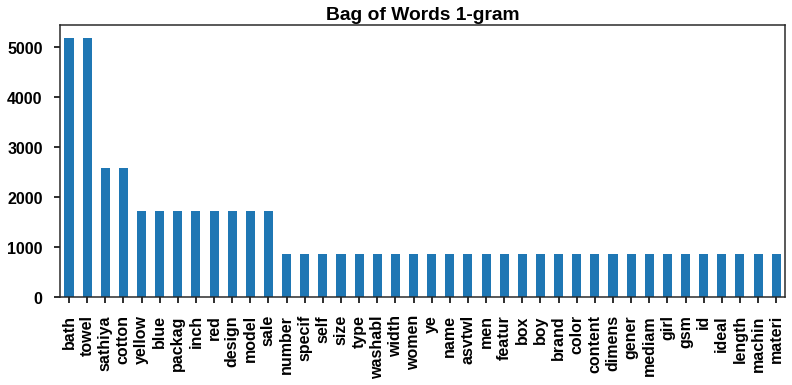

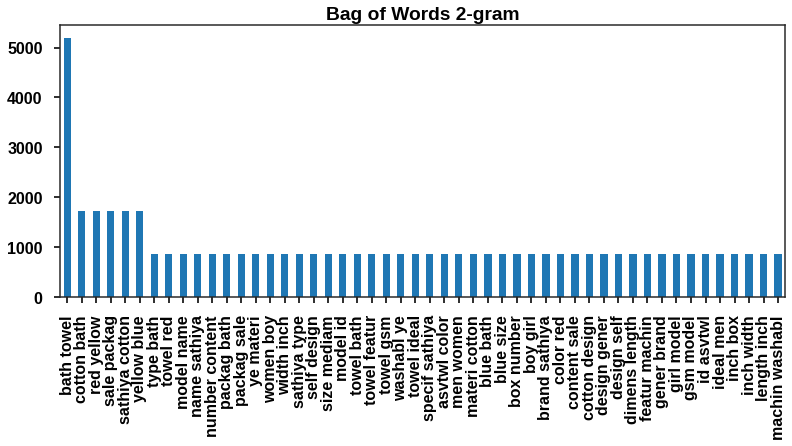

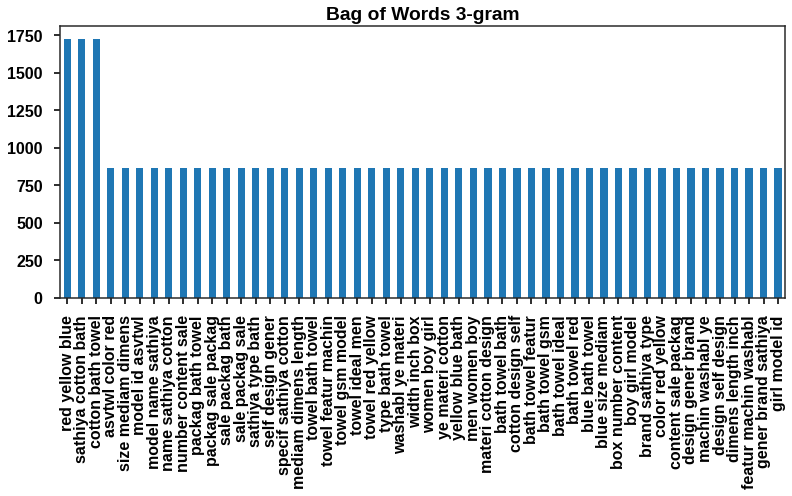

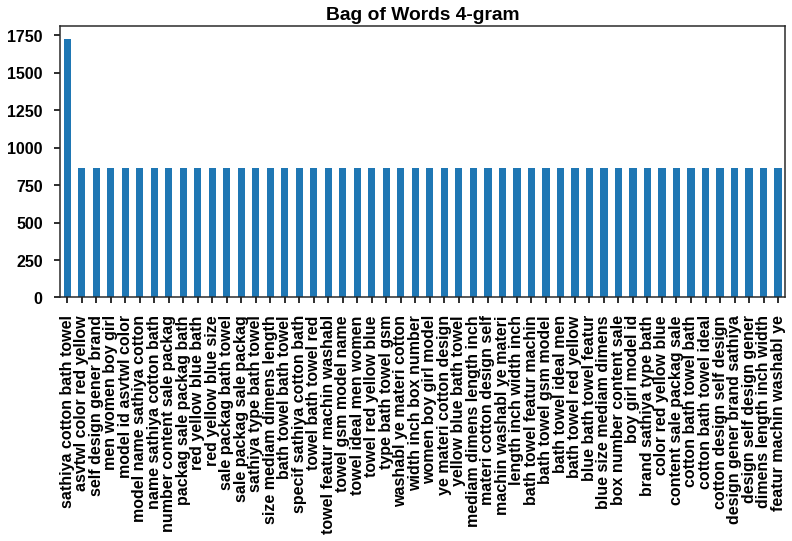

2.964332103729248


In [33]:
t1 = time.time()
for ig in [1,2,3,4]:
    vectorizer = CountVectorizer(ngram_range=(ig,ig))
    bow_matrix = vectorizer.fit_transform(preprocessed_corpus)
    locals()['dfBoW_CountV_gram_'+str(ig)] = BoW(vectorizer, bow_matrix, dfDESCRIPTION, str(ig)+'-gram')
t2 = time.time()
print(t2-t1)

#### Range-Gram

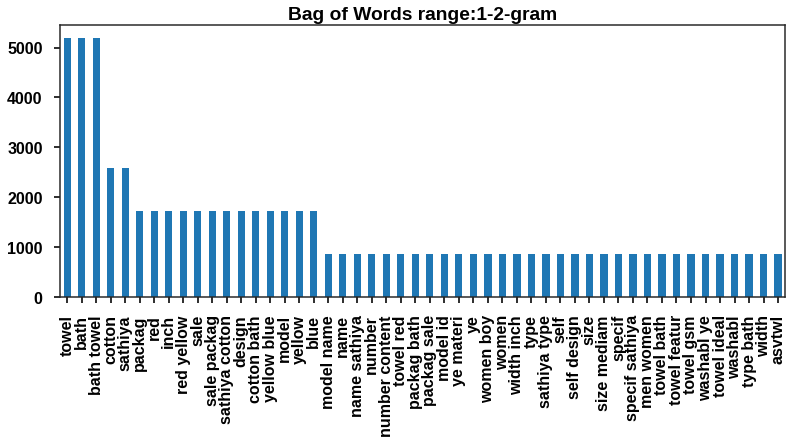

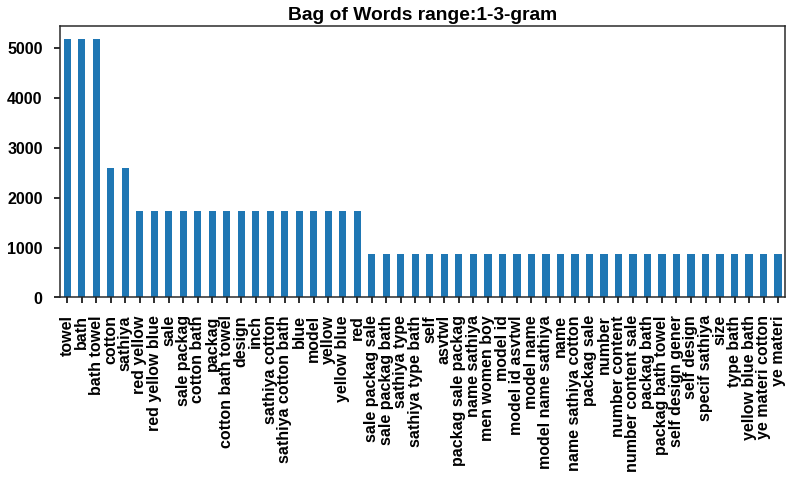

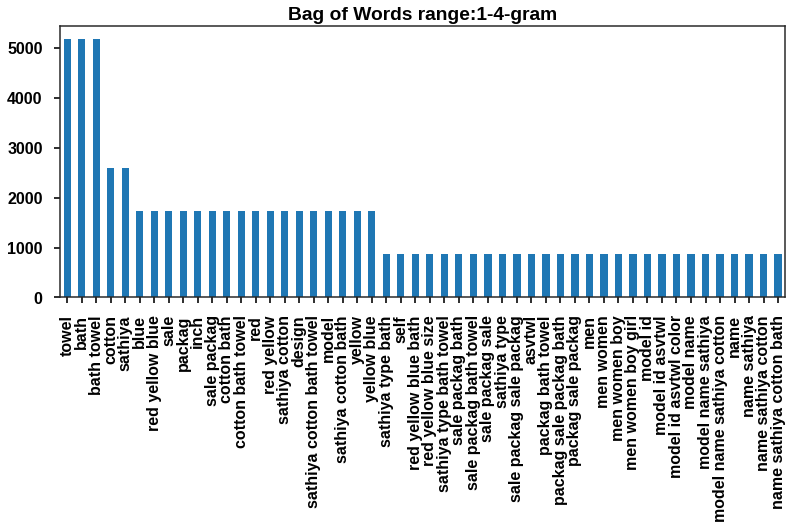

2.1182591915130615


In [34]:
t1 = time.time()
for ig in [2,3,4]:
    vectorizer = CountVectorizer(ngram_range=(1,ig))
    bow_matrix = vectorizer.fit_transform(preprocessed_corpus)
    locals()['dfBoW_CountV_range_gram_'+str(ig)] = BoW(vectorizer, bow_matrix, dfDESCRIPTION, 'range:1-'+str(ig)+'-gram')
t2 = time.time()
print(t2-t1)

### TF-IDF

#### Singel-gram

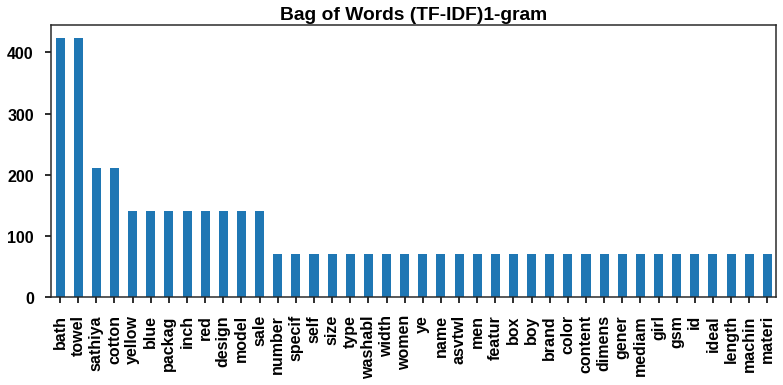

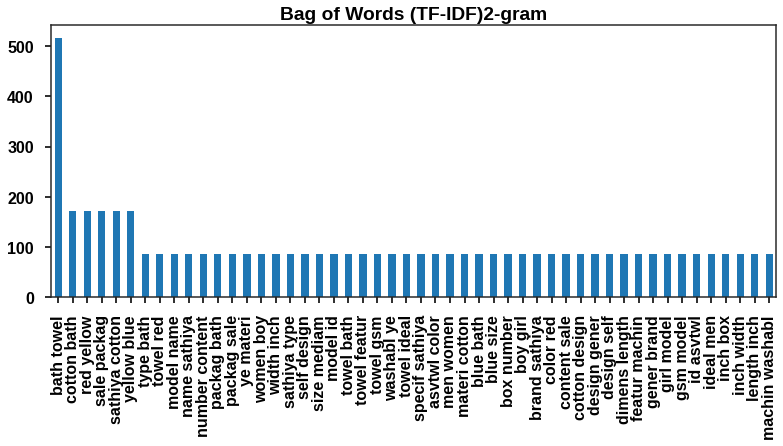

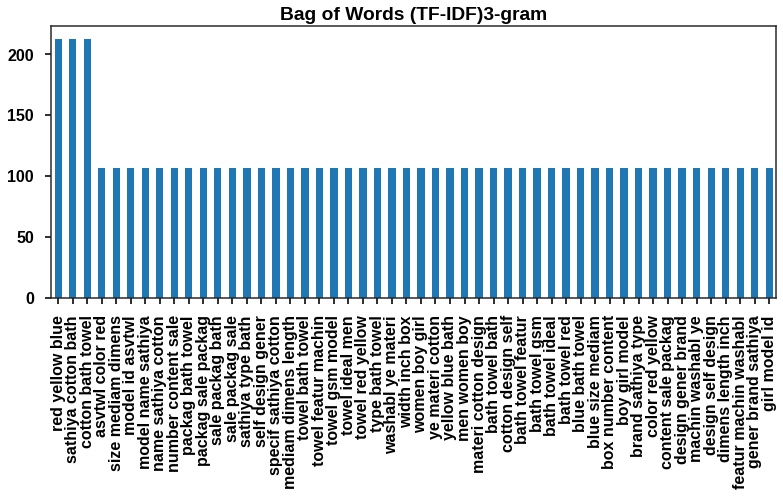

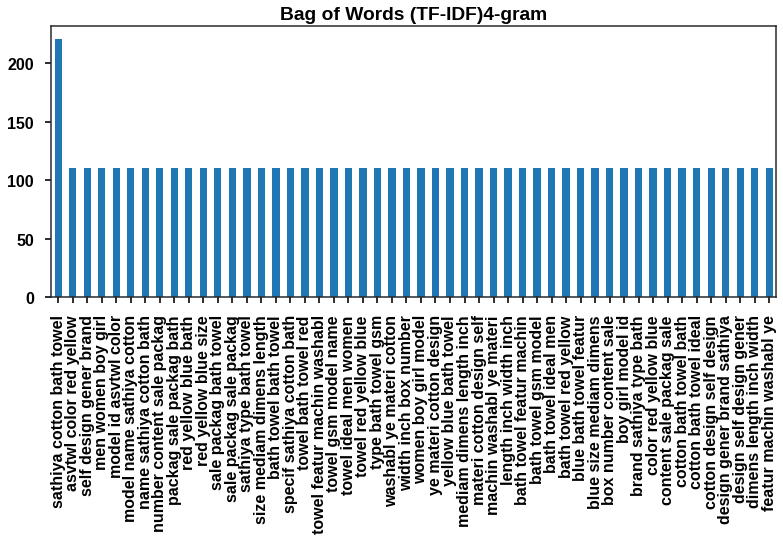

2.5924501419067383


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
t1 = time.time()
for ig in [1,2,3,4]:
    vectorizer = TfidfVectorizer(ngram_range=(ig,ig),norm="l2")
    bow_matrix = vectorizer.fit_transform(preprocessed_corpus)
    locals()['dfBoW_TF_IDF_gram_'+str(ig)] = BoW(vectorizer, bow_matrix, dfDESCRIPTION, '(TF-IDF)'+str(ig)+'-gram')
t2 = time.time()
print(t2-t1)

#### Range-Gram

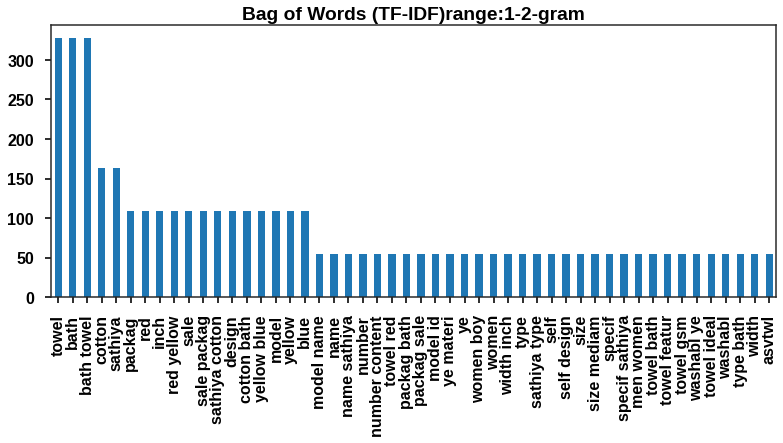

(865, 91)


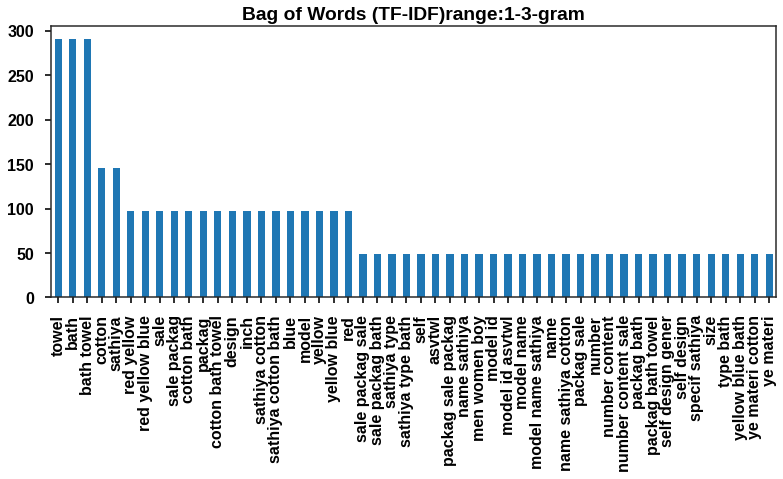

(865, 148)


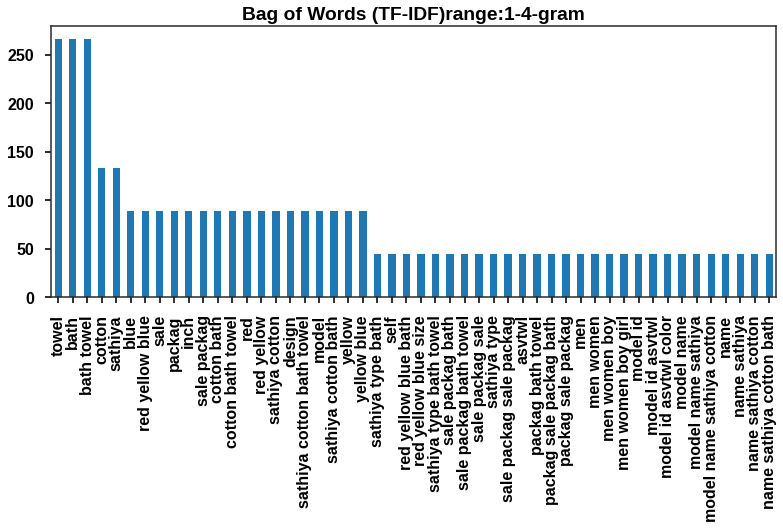

(865, 206)
2.1965765953063965


In [36]:
t1 = time.time()

for ig in [2,3,4]:
    vectorizer = TfidfVectorizer(ngram_range=(1,ig),norm="l2")
    bow_matrix = vectorizer.fit_transform(preprocessed_corpus)
    locals()['dfBoW_TF_IDF_range_gram_'+str(ig)] = BoW(vectorizer, bow_matrix, dfDESCRIPTION, '(TF-IDF)range:1-'+str(ig)+'-gram')
    print(eval('dfBoW_TF_IDF_range_gram_'+str(ig)).shape)
t2 = time.time()
print(t2-t1)

### T-SNE

In [37]:
ls_gram=['dfBoW_CountV_gram_', 'dfBoW_TF_IDF_gram_']
lr_gram=['dfBoW_CountV_range_gram_', 'dfBoW_TF_IDF_range_gram_']
dfBoW_CountV_range_gram_4.shape

(865, 206)

#### Singel-gram

for lg in ls_gram:
    for ig in [1,2,3,4]:
        df_TSNE = eval(lg+str(ig)).copy()
        name = lg+str(ig)

        df_TSNE = df_TSNE.drop('sum', axis=0)

        df_TSNE.columns = df_TSNE.columns.str.lower().str.replace(' ', '_').to_list()

        #df_TSNE['product_category_tree_0'] = dfDATA_Clean['product_category_tree_0']
        min_bic = np.infty
        prx=np.sqrt(len(df_TSNE))
        times = np.zeros((np.int64(prx.round(0))+2))
        t1 = time.time()

        tsne = TSNE(n_components=2, random_state=42, perplexity=prx, n_iter=300)
        npdf_TSNE = tsne.fit_transform(df_TSNE.convert_dtypes())
        joblib.dump(npdf_TSNE, dirDATA + 'TSNE-'+ name +'.pkl')

        t2 = time.time()

        print(t2-t1)

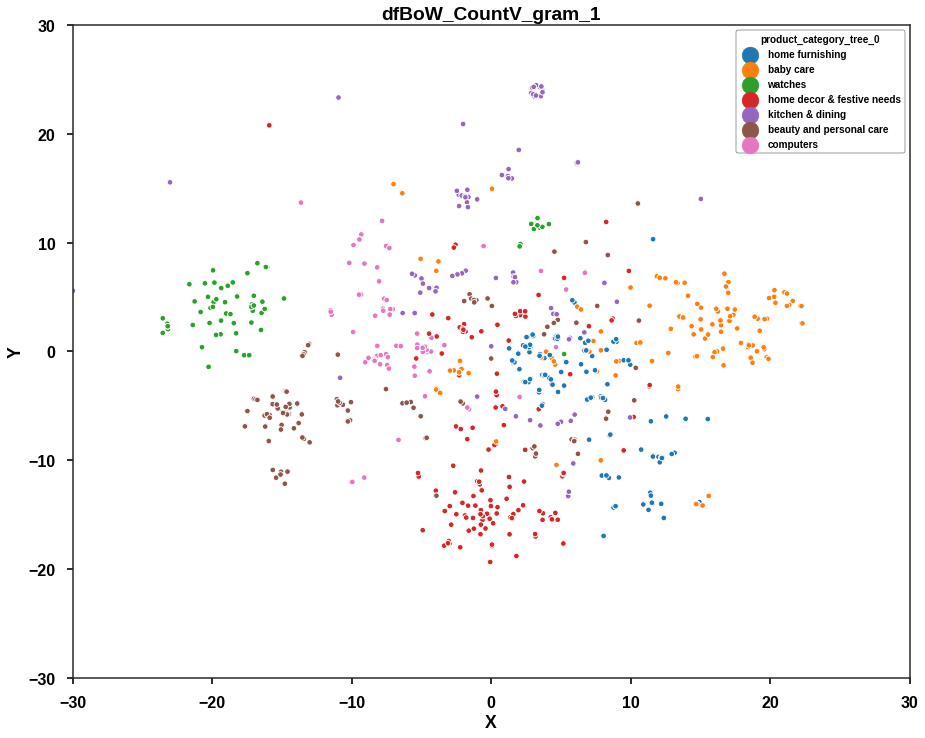

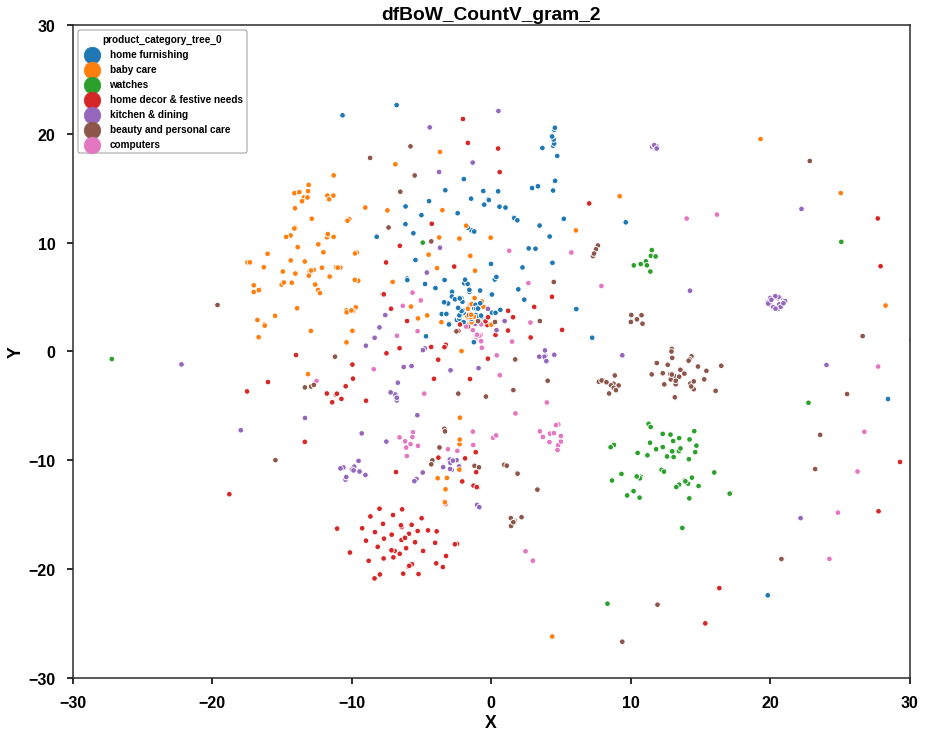

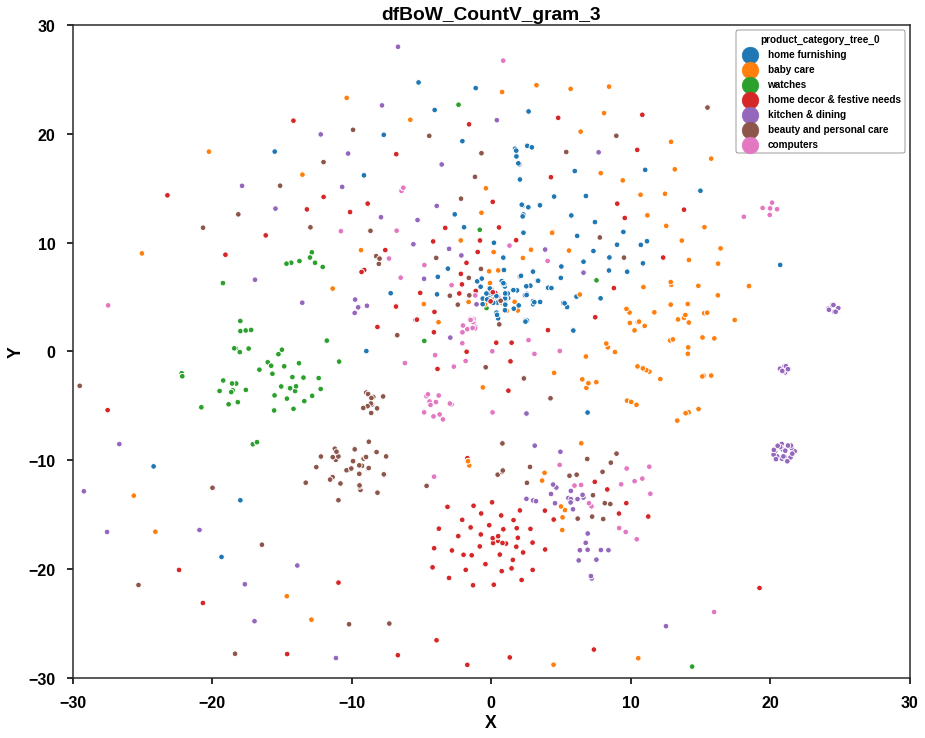

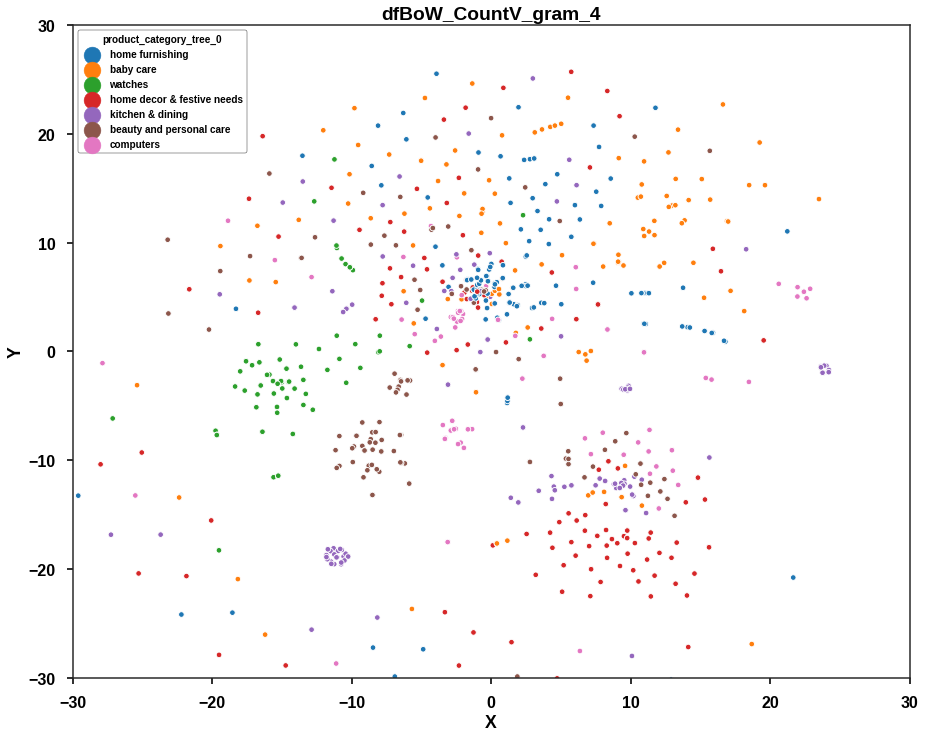

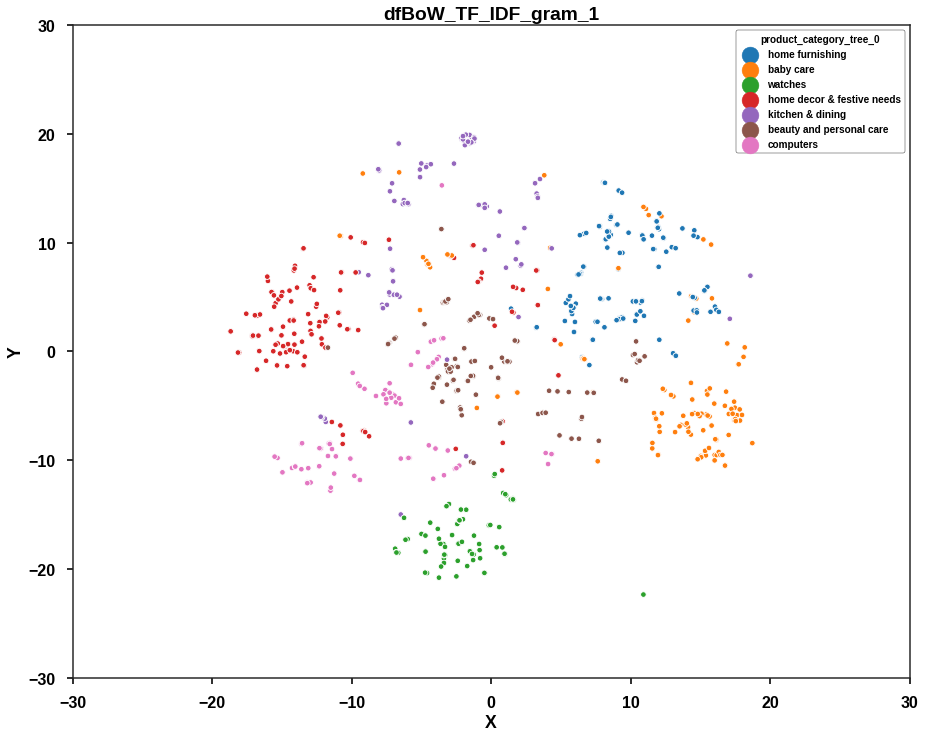

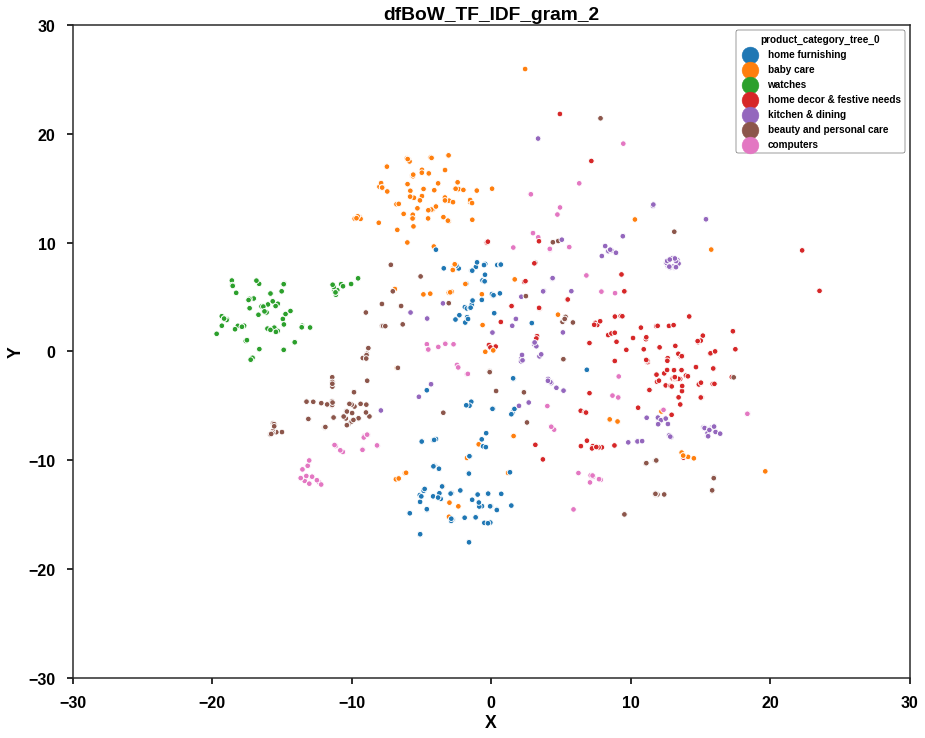

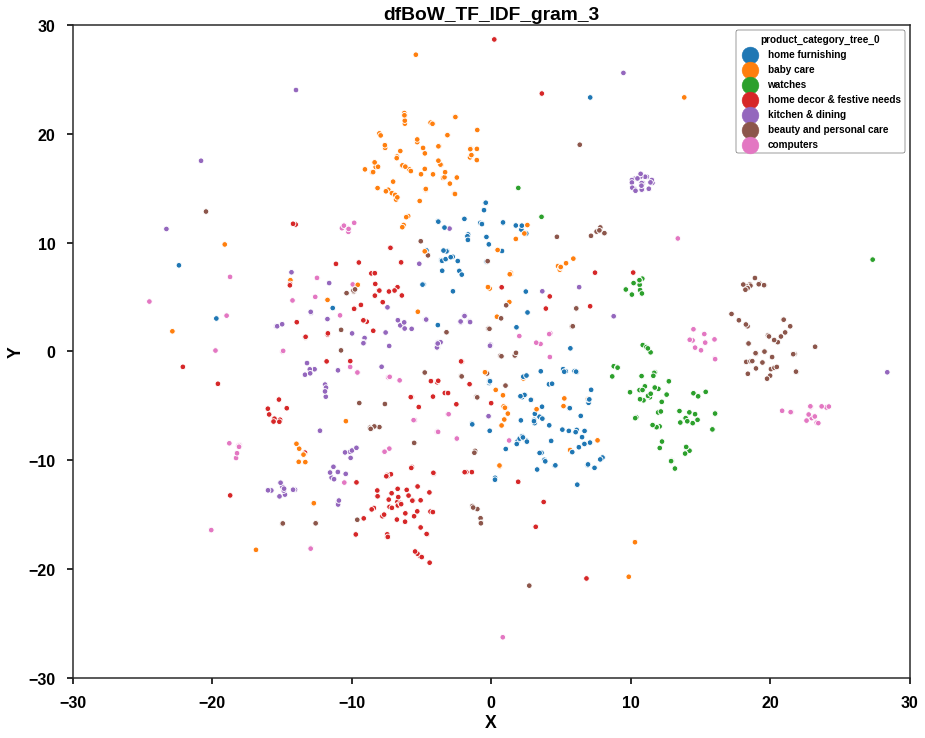

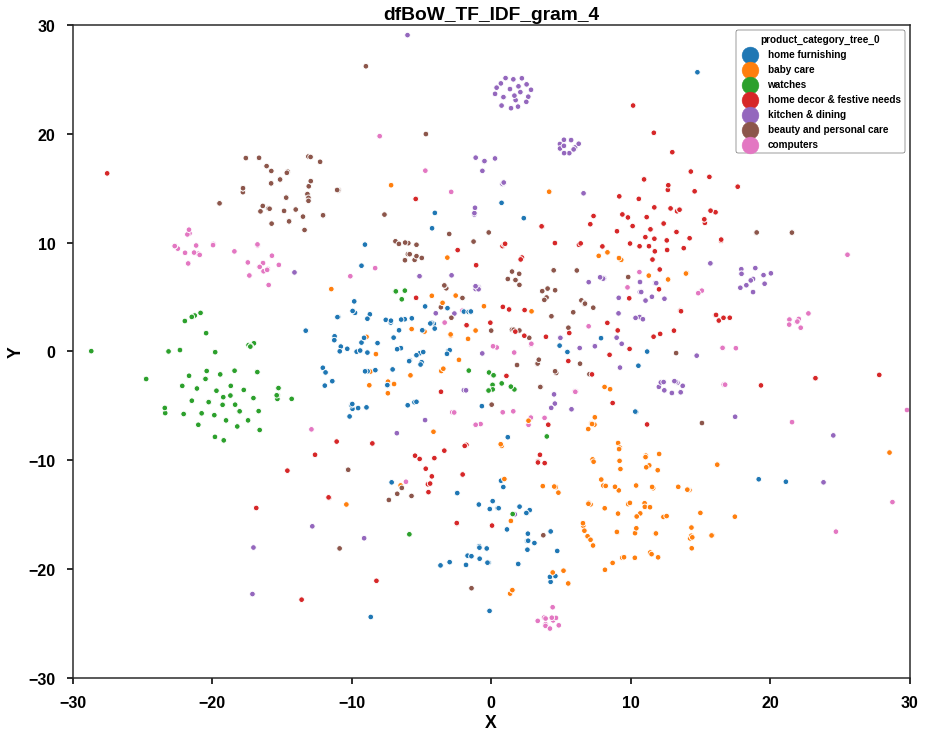

In [38]:
plt.rcParams["figure.figsize"] = [10*1.5,8*1.5]

for lg in ls_gram:
    for ig in [1,2,3,4]:
        fig = plt.figure()
        name = lg+str(ig)
        npdf_TSNE = joblib.load(dirDATA + 'TSNE-'+ name +'.pkl') #search_Grid = joblib.load(model_names_Grid[c]+'_CO2_Multi.pkl')
        df_TSNE = pd.DataFrame(npdf_TSNE, columns=['X','Y'], index=dfDATA_Clean.index)
        df_TSNE['product_category_tree_0'] = dfDATA_Clean['product_category_tree_0']

        #plt.figure(figsize=(13,10))
        ax = sns.scatterplot(data=df_TSNE, x="X", y="Y", hue='product_category_tree_0', sizes=0.01)
        ax.set(title=name, xlim=(-30, 30), ylim=(-30, 30)) #, cmap="jet")

        fig.savefig(dirDATA + '4-TSNE_-' + name +'.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')

#### Range-Gram

for lg in lr_gram:
    for ig in [2,3,4]:
        df_TSNE = eval(lg+str(ig)).copy()
        name = lg+str(ig)

        df_TSNE = df_TSNE.drop('sum', axis=0)

        df_TSNE.columns = df_TSNE.columns.str.lower().str.replace(' ', '_').to_list()

        #df_TSNE['product_category_tree_0'] = dfDATA_Clean['product_category_tree_0']
        min_bic = np.infty
        prx=np.sqrt(len(df_TSNE))
        times = np.zeros((np.int64(prx.round(0))+2))
        t1 = time.time()

        tsne = TSNE(n_components=2, random_state=42, perplexity=prx, n_iter=300)
        npdf_TSNE = tsne.fit_transform(df_TSNE.convert_dtypes())
        joblib.dump(npdf_TSNE, dirDATA + 'TSNE-'+ name +'.pkl')

        t2 = time.time()

        print(t2-t1)

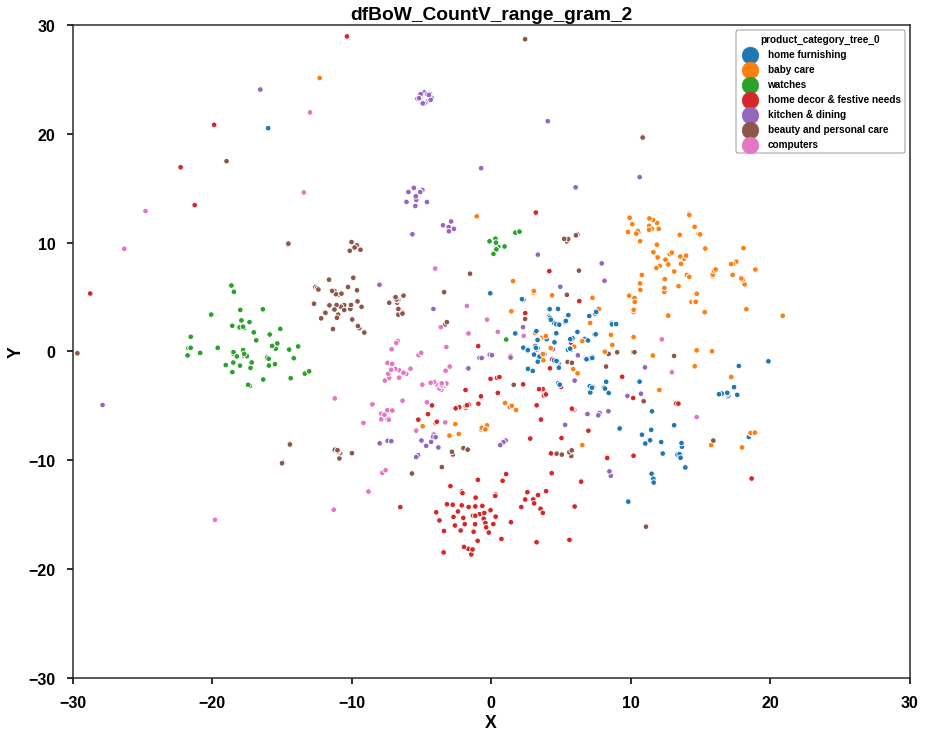

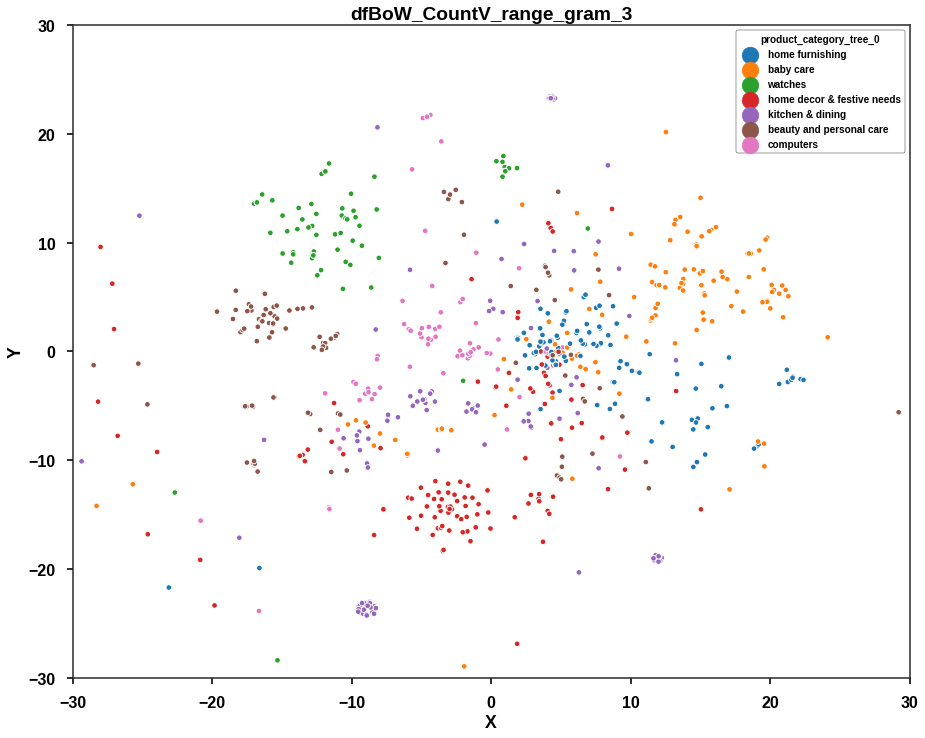

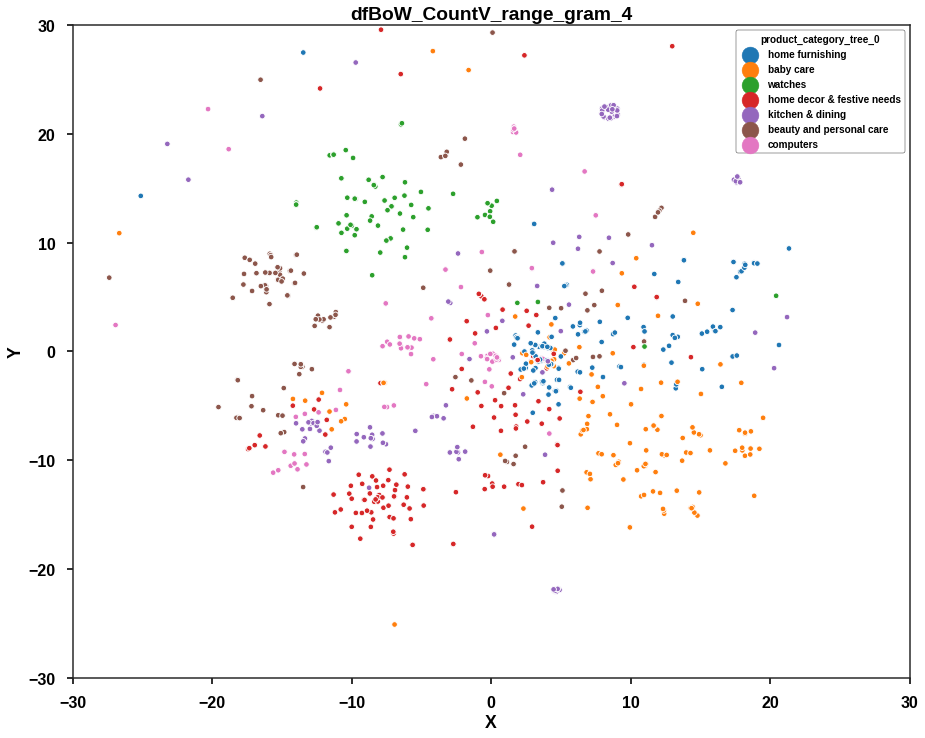

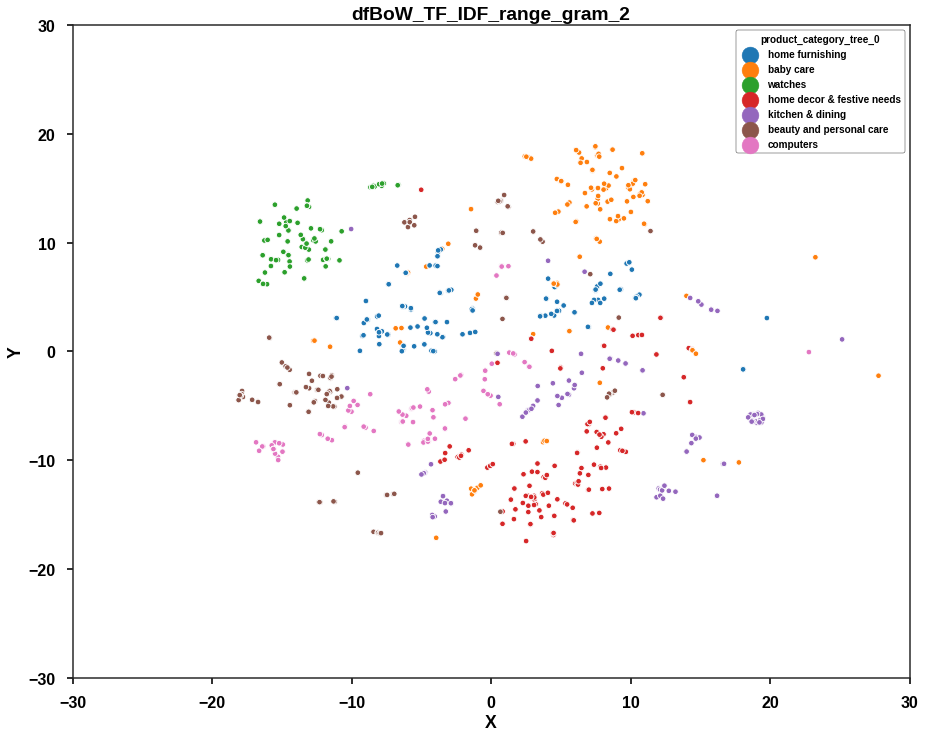

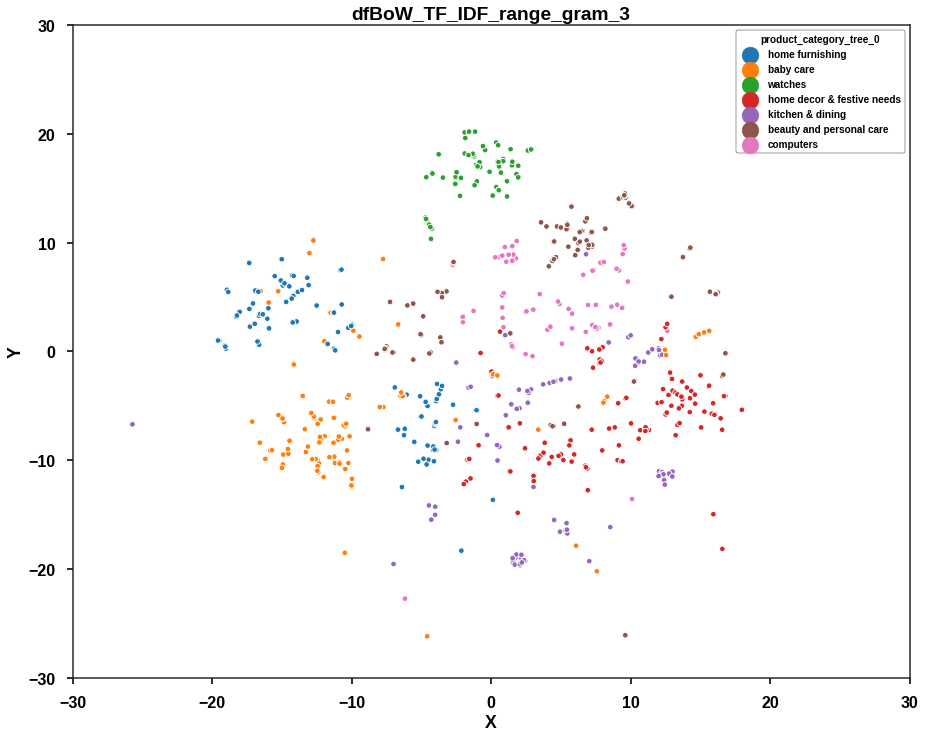

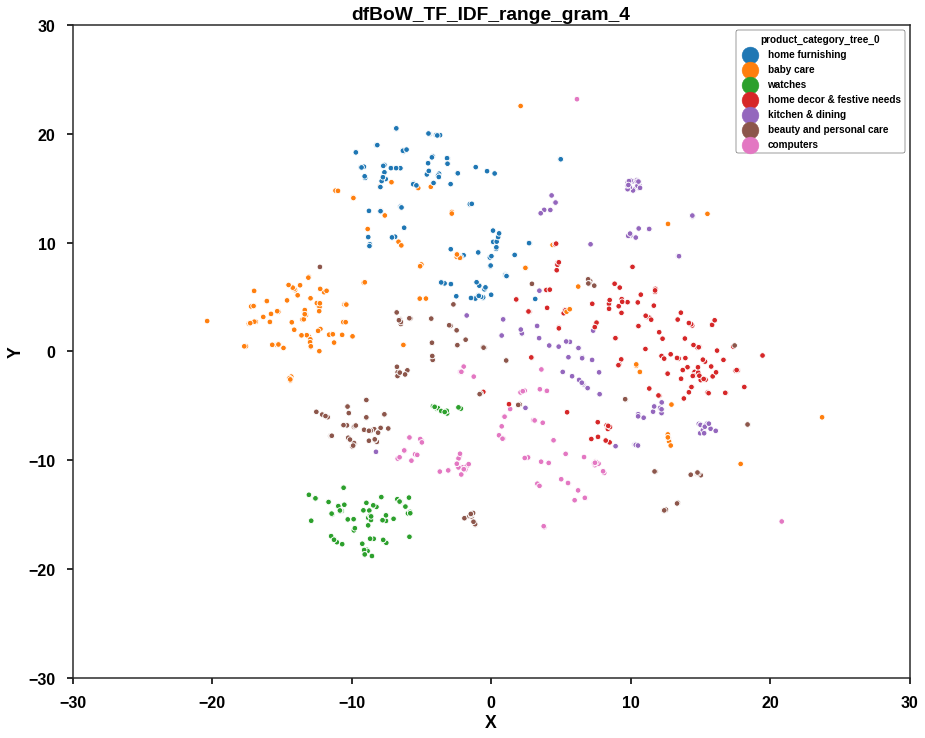

In [39]:
for lg in lr_gram:
    for ig in [2,3,4]:
        fig = plt.figure()
        name = lg+str(ig)
        npdf_TSNE = joblib.load(dirDATA + 'TSNE-'+ name +'.pkl') #search_Grid = joblib.load(model_names_Grid[c]+'_CO2_Multi.pkl')
        df_TSNE = pd.DataFrame(npdf_TSNE, columns=['X','Y'], index=dfDATA_Clean.index)
        df_TSNE['product_category_tree_0'] = dfDATA_Clean['product_category_tree_0']

        #plt.figure(figsize=(13,10))
        ax = sns.scatterplot(data=df_TSNE, x="X", y="Y", hue='product_category_tree_0', sizes=0.01)
        ax.set(title=name, xlim=(-30, 30), ylim=(-30, 30)) #, cmap="jet")

        fig.savefig(dirDATA + '4-TSNE_-' + name +'.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')

Winer : TF-IDF 1-gram
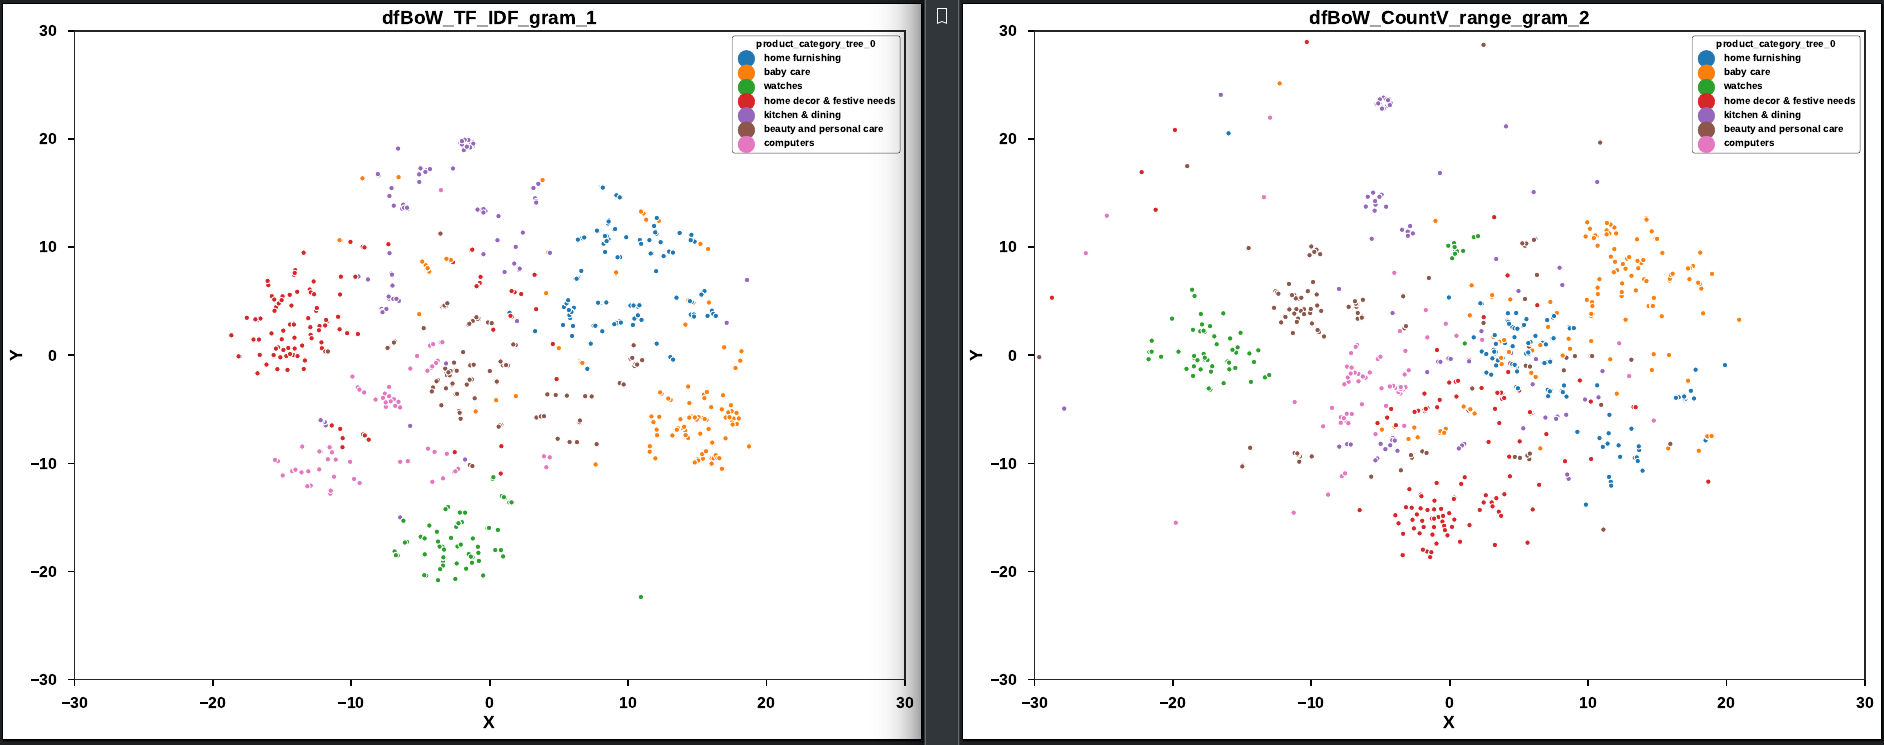

## DATA Transformation

In [40]:
dfDATA_Clean[dfDATA_Clean['retail_price']>20000].head(3)

brand           crawl_timestamp  \
uniq_id                                                            
893aa5ed55f7cff2eccea7758d7a86bd  <NA> 2015-12-04 07:25:36+00:00   
710ed5f2393a4b9e8823aa0029f71f93  <NA> 2015-12-04 07:25:36+00:00   
08452abdadb3db1e686b94a9c52fc7b6  <NA> 2015-12-04 07:25:36+00:00   

                                                                        description  \
uniq_id                                                                               
893aa5ed55f7cff2eccea7758d7a86bd  maserati time r8851116001 analog watch  - for ...   
710ed5f2393a4b9e8823aa0029f71f93  tag heuer cau1116.ba0858 formula 1 analog watc...   
08452abdadb3db1e686b94a9c52fc7b6  cartier w6701005 analog watch  - for boys, men...   

                                  discounted_price  \
uniq_id                                              
893aa5ed55f7cff2eccea7758d7a86bd             24400   
710ed5f2393a4b9e8823aa0029f71f93            107750   
08452abdadb3db1e686b94a9c52fc7b6            201000   

                                                                 image  \
uniq_id                                                                  
893aa5ed55f7cff2eccea7758d7a86bd  893aa5ed55f7cff2eccea7758d7a86bd.jpg   
710ed5f2393a4b9e8823aa0029f71f93  710ed5f2393a4b9e8823aa0029f71f93.jpg   
08452abdadb3db1e686b94a9c52fc7b6  08452abdadb3db1e686b94a9c52fc7b6.jpg   

                                  is_fk_advantage_product  \
uniq_id                                                     
893aa5ed55f7cff2eccea7758d7a86bd                    False   
710ed5f2393a4b9e8823aa0029f71f93                    False   
08452abdadb3db1e686b94a9c52fc7b6                    False   

                                       overall_rating               pid  \
uniq_id                                                                   
893aa5ed55f7cff2eccea7758d7a86bd  no rating available  wateayahj8cucaym   
710ed5f2393a4b9e8823aa0029f71f93  no rating available  watea6ugfgkzkdjc   
08452abdadb3db1e686b94a9c52fc7b6  no rating available  wateak8se2ruk7gm   

                                                                       product_name  \
uniq_id                                                                               
893aa5ed55f7cff2eccea7758d7a86bd  maserati time r8851116001 analog watch  - for ...   
710ed5f2393a4b9e8823aa0029f71f93  tag heuer cau1116.ba0858 formula 1 analog watc...   
08452abdadb3db1e686b94a9c52fc7b6     cartier w6701005 analog watch  - for boys, men   

                                       product_rating  \
uniq_id                                                 
893aa5ed55f7cff2eccea7758d7a86bd  no rating available   
710ed5f2393a4b9e8823aa0029f71f93  no rating available   
08452abdadb3db1e686b94a9c52fc7b6  no rating available   

                                                             product_specifications  \
uniq_id                                                                               
893aa5ed55f7cff2eccea7758d7a86bd  {product_specification=>{key=>chronograph, val...   
710ed5f2393a4b9e8823aa0029f71f93  {product_specification=>{key=>chronograph, val...   
08452abdadb3db1e686b94a9c52fc7b6  {product_specification=>{key=>chronograph, val...   

                                                                        product_url  \
uniq_id                                                                               
893aa5ed55f7cff2eccea7758d7a86bd  http://www.flipkart.com/maserati-time-r8851116...   
710ed5f2393a4b9e8823aa0029f71f93  http://www.flipkart.com/tag-heuer-cau1116-ba08...   
08452abdadb3db1e686b94a9c52fc7b6  http://www.flipkart.com/cartier-w6701005-analo...   

                                  retail_price product_category_tree_0  \
uniq_id                                                                  
893aa5ed55f7cff2eccea7758d7a86bd         24400                 watches   
710ed5f2393a4b9e8823aa0029f71f93        107750                 watches   
08452abdadb3db1e686b94a9c52fc7b6        20

### Extrapolating data

### Derived measures

### Outliers

In [41]:
dfDATA_Clean[dfDATA_Clean['retail_price']>20000].head(3)

brand           crawl_timestamp  \
uniq_id                                                            
893aa5ed55f7cff2eccea7758d7a86bd  <NA> 2015-12-04 07:25:36+00:00   
710ed5f2393a4b9e8823aa0029f71f93  <NA> 2015-12-04 07:25:36+00:00   
08452abdadb3db1e686b94a9c52fc7b6  <NA> 2015-12-04 07:25:36+00:00   

                                                                        description  \
uniq_id                                                                               
893aa5ed55f7cff2eccea7758d7a86bd  maserati time r8851116001 analog watch  - for ...   
710ed5f2393a4b9e8823aa0029f71f93  tag heuer cau1116.ba0858 formula 1 analog watc...   
08452abdadb3db1e686b94a9c52fc7b6  cartier w6701005 analog watch  - for boys, men...   

                                  discounted_price  \
uniq_id                                              
893aa5ed55f7cff2eccea7758d7a86bd             24400   
710ed5f2393a4b9e8823aa0029f71f93            107750   
08452abdadb3db1e686b94a9c52fc7b6            201000   

                                                                 image  \
uniq_id                                                                  
893aa5ed55f7cff2eccea7758d7a86bd  893aa5ed55f7cff2eccea7758d7a86bd.jpg   
710ed5f2393a4b9e8823aa0029f71f93  710ed5f2393a4b9e8823aa0029f71f93.jpg   
08452abdadb3db1e686b94a9c52fc7b6  08452abdadb3db1e686b94a9c52fc7b6.jpg   

                                  is_fk_advantage_product  \
uniq_id                                                     
893aa5ed55f7cff2eccea7758d7a86bd                    False   
710ed5f2393a4b9e8823aa0029f71f93                    False   
08452abdadb3db1e686b94a9c52fc7b6                    False   

                                       overall_rating               pid  \
uniq_id                                                                   
893aa5ed55f7cff2eccea7758d7a86bd  no rating available  wateayahj8cucaym   
710ed5f2393a4b9e8823aa0029f71f93  no rating available  watea6ugfgkzkdjc   
08452abdadb3db1e686b94a9c52fc7b6  no rating available  wateak8se2ruk7gm   

                                                                       product_name  \
uniq_id                                                                               
893aa5ed55f7cff2eccea7758d7a86bd  maserati time r8851116001 analog watch  - for ...   
710ed5f2393a4b9e8823aa0029f71f93  tag heuer cau1116.ba0858 formula 1 analog watc...   
08452abdadb3db1e686b94a9c52fc7b6     cartier w6701005 analog watch  - for boys, men   

                                       product_rating  \
uniq_id                                                 
893aa5ed55f7cff2eccea7758d7a86bd  no rating available   
710ed5f2393a4b9e8823aa0029f71f93  no rating available   
08452abdadb3db1e686b94a9c52fc7b6  no rating available   

                                                             product_specifications  \
uniq_id                                                                               
893aa5ed55f7cff2eccea7758d7a86bd  {product_specification=>{key=>chronograph, val...   
710ed5f2393a4b9e8823aa0029f71f93  {product_specification=>{key=>chronograph, val...   
08452abdadb3db1e686b94a9c52fc7b6  {product_specification=>{key=>chronograph, val...   

                                                                        product_url  \
uniq_id                                                                               
893aa5ed55f7cff2eccea7758d7a86bd  http://www.flipkart.com/maserati-time-r8851116...   
710ed5f2393a4b9e8823aa0029f71f93  http://www.flipkart.com/tag-heuer-cau1116-ba08...   
08452abdadb3db1e686b94a9c52fc7b6  http://www.flipkart.com/cartier-w6701005-analo...   

                                  retail_price product_category_tree_0  \
uniq_id                                                                  
893aa5ed55f7cff2eccea7758d7a86bd         24400                 watches   
710ed5f2393a4b9e8823aa0029f71f93        107750                 watches   
08452abdadb3db1e686b94a9c52fc7b6        20

## COMBINING data

### Merging/joing data sets

### Set operators

### Creating views

## DATA Exploration

### Simple graphs

### Combined graphs

### Link and brush

### Nongraphical techniques

## DATA modeling

In [42]:
dfBoW_TF_IDF_gram_1['product_category_tree_0'] = dfDATA_Clean['product_category_tree_0']
dfBoW_TF_IDF_gram_1 = dfBoW_TF_IDF_gram_1.drop('sum', axis=0)
dfBoW_TF_IDF_gram_1

bath     towel   sathiya    cotton  \
uniq_id                                                                    
55b85ea15a1536d46b7190ad6fff8ce7  0.489898  0.489898  0.244949  0.244949   
7b72c92c2f6c40268628ec5f14c6d590  0.489898  0.489898  0.244949  0.244949   
d4684dcdc759dd9cdf41504698d737d8  0.489898  0.489898  0.244949  0.244949   
6325b6870c54cd47be6ebfbffa620ec7  0.489898  0.489898  0.244949  0.244949   
893aa5ed55f7cff2eccea7758d7a86bd  0.489898  0.489898  0.244949  0.244949   
...                                    ...       ...       ...       ...   
be0f39341d771aac57084970f1ed6425  0.489898  0.489898  0.244949  0.244949   
958f54f4c46b53c8a0a9b8167d9140bc  0.489898  0.489898  0.244949  0.244949   
fd6cbcc22efb6b761bd564c28928483c  0.489898  0.489898  0.244949  0.244949   
5912e037d12774bb73a2048f35a00009  0.489898  0.489898  0.244949  0.244949   
c3edc504d1b4f0ba6224fa53a43a7ad6  0.489898  0.489898  0.244949  0.244949   

                                    yellow      blue    packag      inch  \
uniq_id                                                                    
55b85ea15a1536d46b7190ad6fff8ce7  0.163299  0.163299  0.163299  0.163299   
7b72c92c2f6c40268628ec5f14c6d590  0.163299  0.163299  0.163299  0.163299   
d4684dcdc759dd9cdf41504698d737d8  0.163299  0.163299  0.163299  0.163299   
6325b6870c54cd47be6ebfbffa620ec7  0.163299  0.163299  0.163299  0.163299   
893aa5ed55f7cff2eccea7758d7a86bd  0.163299  0.163299  0.163299  0.163299   
...                                    ...       ...       ...       ...   
be0f39341d771aac57084970f1ed6425  0.163299  0.163299  0.163299  0.163299   
958f54f4c46b53c8a0a9b8167d9140bc  0.163299  0.163299  0.163299  0.163299   
fd6cbcc22efb6b761bd564c28928483c  0.163299  0.163299  0.163299  0.163299   
5912e037d12774bb73a2048f35a00009  0.163299  0.163299  0.163299  0.163299   
c3edc504d1b4f0ba6224fa53a43a7ad6  0.163299  0.163299  0.163299  0.163299   

                                       red    design     model      sale  \
uniq_id                                                                    
55b85ea15a1536d46b7190ad6fff8ce7  0.163299  0.163299  0.163299  0.163299   
7b72c92c2f6c40268628ec5f14c6d590  0.163299  0.163299  0.163299  0.163299   
d4684dcdc759dd9cdf41504698d737d8  0.163299  0.163299  0.163299  0.163299   
6325b6870c54cd47be6ebfbffa620ec7  0.163299  0.163299  0.163299  0.163299   
893aa5ed55f7cff2eccea7758d7a86bd  0.163299  0.163299  0.163299  0.163299   
...                                    ...       ...       ...       ...   
be0f39341d771aac57084970f1ed6425  0.163299  0.163299  0.163299  0.163299   
958f54f4c46b53c8a0a9b8167d9140bc  0.163299  0.163299  0.163299  0.163299   
fd6cbcc22efb6b761bd564c28928483c  0.163299  0.163299  0.163299  0.163299   
5912e037d12774bb73a2048f35a00009  0.163299  0.163299  0.163299  0.163299   
c3edc504d1b4f0ba6224fa53a43a7ad6  0.163299  0.163299  0.163299  0.163299   

                                   number   specif     self     size     type  \
uniq_id                                                                         
55b85ea15a1536d46b7190ad6fff8ce7  0.08165  0.08165  0.08165  0.08165  0.08165   
7b72c92c2f6c40268628ec5f14c6d590  0.08165  0.08165  0.08165  0.08165  0.08165   
d4684dcdc759dd9cdf41504698d737d8  0.08165  0.08165  0.08165  0.08165  0.08165   
6325b6870c54cd47be6ebfbffa620ec7  0.08165  0.08165  0.08165  0.08165  0.08165   
893aa5ed55f7cff2eccea7758d7a86bd  0.08165  0.08165  0.08165  0.08165  0.08165   
...                                   ...      ...      ...      ...      ...   
be0f39341d771aac57084970f1ed6425  0.08165  0.08165  0.08165  0.08165  0.08165   
958f54f4c46b53c8a0a9b8167d9140bc  0.08165  0.08165  0.08165  0.08165  0.08165   
fd6cbcc22efb6b761bd564c28928483c  0.08165  0.08165  0.08165  0.08165  0.08165   
5912e037d12774bb73a2048f35a00009  0.08165  0.08165  0.08165  0.08165  0.08165   
c3edc504d1b4f0ba6224fa53a43a7ad6  0.08165  0.08165  0.08165  0.08165  0.08165   

                 

### Training and Test Set split

In [43]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(dfBoW_TF_IDF_gram_1, dfBoW_TF_IDF_gram_1['product_category_tree_0'], test_size=0.2, random_state=0)
Xtrain = Xtrain.drop(['product_category_tree_0'], axis=1)
Xtest = Xtest.drop(['product_category_tree_0'], axis=1)
Xtrain

bath     towel   sathiya    cotton  \
uniq_id                                                                    
e93cd13f5269dd51b8359ccf93ca5ace  0.489898  0.489898  0.244949  0.244949   
c5590e238d44b370337624f5987fb9b8  0.489898  0.489898  0.244949  0.244949   
bb18279e9885136f1dbc8676d4af94e3  0.489898  0.489898  0.244949  0.244949   
fd6cbcc22efb6b761bd564c28928483c  0.489898  0.489898  0.244949  0.244949   
0abfcbe0e17dd50c4cf5fb1d6037d514  0.489898  0.489898  0.244949  0.244949   
...                                    ...       ...       ...       ...   
6057d1b6682ab473a3fe2ca8b4577259  0.489898  0.489898  0.244949  0.244949   
e3e7c584f317d1b5d6ac0088c411565e  0.489898  0.489898  0.244949  0.244949   
c705a5735a94aeee547d1798e3e46ec4  0.489898  0.489898  0.244949  0.244949   
595f508cdfbfa162d0fe7b97cc99ef42  0.489898  0.489898  0.244949  0.244949   
82466269245f199d7f850509307a497b  0.489898  0.489898  0.244949  0.244949   

                                    yellow      blue    packag      inch  \
uniq_id                                                                    
e93cd13f5269dd51b8359ccf93ca5ace  0.163299  0.163299  0.163299  0.163299   
c5590e238d44b370337624f5987fb9b8  0.163299  0.163299  0.163299  0.163299   
bb18279e9885136f1dbc8676d4af94e3  0.163299  0.163299  0.163299  0.163299   
fd6cbcc22efb6b761bd564c28928483c  0.163299  0.163299  0.163299  0.163299   
0abfcbe0e17dd50c4cf5fb1d6037d514  0.163299  0.163299  0.163299  0.163299   
...                                    ...       ...       ...       ...   
6057d1b6682ab473a3fe2ca8b4577259  0.163299  0.163299  0.163299  0.163299   
e3e7c584f317d1b5d6ac0088c411565e  0.163299  0.163299  0.163299  0.163299   
c705a5735a94aeee547d1798e3e46ec4  0.163299  0.163299  0.163299  0.163299   
595f508cdfbfa162d0fe7b97cc99ef42  0.163299  0.163299  0.163299  0.163299   
82466269245f199d7f850509307a497b  0.163299  0.163299  0.163299  0.163299   

                                       red    design     model      sale  \
uniq_id                                                                    
e93cd13f5269dd51b8359ccf93ca5ace  0.163299  0.163299  0.163299  0.163299   
c5590e238d44b370337624f5987fb9b8  0.163299  0.163299  0.163299  0.163299   
bb18279e9885136f1dbc8676d4af94e3  0.163299  0.163299  0.163299  0.163299   
fd6cbcc22efb6b761bd564c28928483c  0.163299  0.163299  0.163299  0.163299   
0abfcbe0e17dd50c4cf5fb1d6037d514  0.163299  0.163299  0.163299  0.163299   
...                                    ...       ...       ...       ...   
6057d1b6682ab473a3fe2ca8b4577259  0.163299  0.163299  0.163299  0.163299   
e3e7c584f317d1b5d6ac0088c411565e  0.163299  0.163299  0.163299  0.163299   
c705a5735a94aeee547d1798e3e46ec4  0.163299  0.163299  0.163299  0.163299   
595f508cdfbfa162d0fe7b97cc99ef42  0.163299  0.163299  0.163299  0.163299   
82466269245f199d7f850509307a497b  0.163299  0.163299  0.163299  0.163299   

                                   number   specif     self     size     type  \
uniq_id                                                                         
e93cd13f5269dd51b8359ccf93ca5ace  0.08165  0.08165  0.08165  0.08165  0.08165   
c5590e238d44b370337624f5987fb9b8  0.08165  0.08165  0.08165  0.08165  0.08165   
bb18279e9885136f1dbc8676d4af94e3  0.08165  0.08165  0.08165  0.08165  0.08165   
fd6cbcc22efb6b761bd564c28928483c  0.08165  0.08165  0.08165  0.08165  0.08165   
0abfcbe0e17dd50c4cf5fb1d6037d514  0.08165  0.08165  0.08165  0.08165  0.08165   
...                                   ...      ...      ...      ...      ...   
6057d1b6682ab473a3fe2ca8b4577259  0.08165  0.08165  0.08165  0.08165  0.08165   
e3e7c584f317d1b5d6ac0088c411565e  0.08165  0.08165  0.08165  0.08165  0.08165   
c705a5735a94aeee547d1798e3e46ec4  0.08165  0.08165  0.08165  0.08165  0.08165   
595f508cdfbfa162d0fe7b97cc99ef42  0.08165  0.08165  0.08165  0.08165  0.08165   
82466269245f199d7f850509307a497b  0.08165  0.08165  0.08165  0.08165  0.08165   

                 

### LabelEncoder

In [44]:
from sklearn.preprocessing import LabelEncoder
#for iVAR in ['PrimaryPropertyType', 'Zip Codes'] :

enc = LabelEncoder().fit(ytrain)
ytrain_encoded = enc.transform(ytrain)
ytest_encoded = enc.transform(ytest)
    

ytrain_encoded

array([1, 5, 2, 0, 1, 3, 3, 0, 5, 3, 5, 1, 1, 6, 6, 0, 4, 5, 1, 2, 6, 1,
       5, 5, 4, 3, 0, 5, 3, 3, 0, 5, 5, 3, 0, 3, 1, 4, 1, 1, 2, 0, 4, 3,
       1, 4, 3, 0, 0, 5, 5, 0, 1, 0, 2, 6, 4, 0, 2, 5, 0, 2, 1, 1, 1, 0,
       1, 5, 4, 1, 1, 6, 6, 6, 5, 6, 5, 1, 3, 5, 3, 3, 2, 3, 6, 3, 6, 0,
       0, 0, 1, 4, 3, 0, 6, 0, 2, 1, 1, 3, 1, 5, 3, 0, 6, 1, 0, 4, 4, 3,
       1, 2, 2, 0, 6, 4, 1, 6, 5, 2, 5, 3, 5, 0, 1, 2, 4, 2, 3, 4, 6, 1,
       4, 5, 3, 5, 5, 3, 0, 4, 6, 4, 4, 5, 0, 0, 3, 6, 1, 0, 0, 5, 5, 0,
       1, 0, 0, 4, 3, 3, 0, 3, 1, 3, 0, 2, 3, 5, 0, 3, 2, 4, 6, 0, 0, 6,
       4, 4, 2, 0, 1, 6, 3, 1, 1, 1, 4, 1, 6, 4, 5, 5, 2, 4, 0, 3, 0, 3,
       2, 4, 4, 5, 4, 0, 5, 5, 3, 3, 1, 1, 0, 4, 4, 3, 4, 6, 4, 4, 3, 6,
       3, 1, 2, 5, 0, 4, 2, 5, 2, 3, 0, 4, 4, 5, 3, 5, 1, 1, 6, 2, 6, 0,
       3, 4, 1, 4, 6, 2, 0, 5, 5, 1, 1, 0, 0, 0, 5, 4, 0, 4, 0, 1, 4, 1,
       4, 5, 2, 0, 0, 3, 6, 1, 1, 3, 5, 0, 2, 1, 3, 6, 5, 4, 1, 4, 3, 1,
       0, 6, 2, 5, 4, 0, 3, 2, 2, 0, 1, 1, 2, 5, 4,

### Scaling

from sklearn.preprocessing import MinMaxScaler
for iVAR in Xtrain.columns :
    scal = MinMaxScaler().fit(Xtrain)
    Xtrain_S_E = scal.transform(Xtrain)
    Xtest_S_E = scal.transform(Xtest)
    
    Xtrain_S_E = pd.DataFrame(Xtrain_S_E, columns=Xtrain.columns, index=Xtrain.index)
    Xtest_S_E = pd.DataFrame(Xtest_S_E, columns=Xtest.columns, index=Xtest.index)
    
    joblib.dump(Xtrain_S_E, dirDATA + 'Xtrain_S_E-.pkl') #search_Grid = joblib.load(model_names_Grid[c]+'_CO2_Multi.pkl')
    joblib.dump(Xtest_S_E, dirDATA + 'Xtest_S_E-.pkl') #search_Grid = joblib.load(model_names_Grid[c]+'_CO2_Multi.pkl')

Xtrain_S_E

In [45]:
Xtrain_S_E = joblib.load(dirDATA + 'Xtrain_S_E-.pkl')
Xtest_S_E = joblib.load(dirDATA + 'Xtest_S_E-.pkl')

### Naive Bayes

In [46]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(Xtrain_S_E, ytrain_encoded)
ypred = clf.predict(Xtest_S_E)

In [47]:
from sklearn.metrics import confusion_matrix
npConfusionM = confusion_matrix(ytest_encoded, ypred)
pd.DataFrame(npConfusionM)

0   1   2   3   4   5   6
0  25   1   0   5   4   0   1
1   0  15   0   0   0   0   0
2   0   2  26   0   0   0   0
3   0   1   0  24   0   0   0
4   2   0   0   0  28   0   0
5   1   1   0   2   0  20   0
6   1   0   0   0   0   1  13

In [48]:
dfConfusionM = pd.DataFrame(npConfusionM)
dfConfusionM.columns = list(enc.inverse_transform(dfConfusionM.columns))
dfConfusionM.index = list(enc.inverse_transform(dfConfusionM.index))

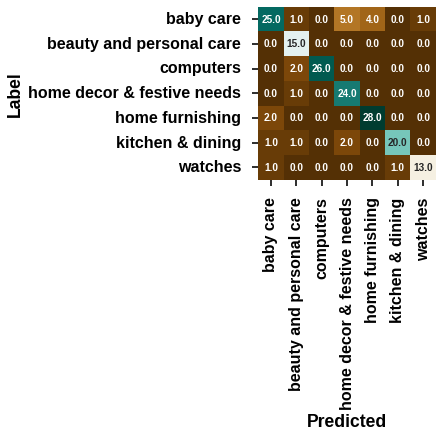

In [49]:
plt.rcParams["figure.figsize"] = [len(dfConfusionM)/2.2,len(dfConfusionM)/2.2]
heatmap = sns.heatmap(dfConfusionM,  annot=True, fmt='.1f', cmap='BrBG', cbar=False) #, mask=mask)
heatmap.set(xlabel='Predicted', ylabel='Label')
plt.savefig(dirDATA + '3-dfConfusionM.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')
plt.style.use('seaborn-poster') 

#### SCORE verifier metric

In [50]:
clf.score(Xtest_S_E, ytest_encoded) #accuracy (precision)

0.8728323699421965

## ELI5

In [51]:
Xtrain.columns

Index(['bath', 'towel', 'sathiya', 'cotton', 'yellow', 'blue', 'packag',
       'inch', 'red', 'design', 'model', 'sale', 'number', 'specif', 'self',
       'size', 'type', 'washabl', 'width', 'women', 'ye', 'name', 'asvtwl',
       'men', 'featur', 'box', 'boy', 'brand', 'color', 'content', 'dimens',
       'gener', 'mediam', 'girl', 'gsm', 'id', 'ideal', 'length', 'machin',
       'materi'],
      dtype='object')

In [52]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(dfDATA_Clean, dfDATA_Clean['product_category_tree_0'], test_size=0.2, random_state=0)
Xtrain = Xtrain.drop(['product_category_tree_0'], axis=1)
Xtest = Xtest.drop(['product_category_tree_0'], axis=1)
Xtrain.head(3)

brand           crawl_timestamp  \
uniq_id                                                                  
e93cd13f5269dd51b8359ccf93ca5ace        <NA> 2015-12-01 06:13:00+00:00   
c5590e238d44b370337624f5987fb9b8        <NA> 2015-12-01 12:40:44+00:00   
bb18279e9885136f1dbc8676d4af94e3  clublaptop 2016-01-07 05:50:25+00:00   

                                                                        description  \
uniq_id                                                                               
e93cd13f5269dd51b8359ccf93ca5ace  flipkart.com: buy denver ro,black code gift se...   
c5590e238d44b370337624f5987fb9b8  rockmantra abstrcts 8 ceramic mug _5.5 l_
   ...   
bb18279e9885136f1dbc8676d4af94e3  clublaptop lenovo l08o6c02 6 cell laptop batte...   

                                  discounted_price  \
uniq_id                                              
e93cd13f5269dd51b8359ccf93ca5ace               355   
c5590e238d44b370337624f5987fb9b8               199   
bb18279e9885136f1dbc8676d4af94e3              1790   

                                                                 image  \
uniq_id                                                                  
e93cd13f5269dd51b8359ccf93ca5ace  e93cd13f5269dd51b8359ccf93ca5ace.jpg   
c5590e238d44b370337624f5987fb9b8  c5590e238d44b370337624f5987fb9b8.jpg   
bb18279e9885136f1dbc8676d4af94e3  bb18279e9885136f1dbc8676d4af94e3.jpg   

                                  is_fk_advantage_product  \
uniq_id                                                     
e93cd13f5269dd51b8359ccf93ca5ace                    False   
c5590e238d44b370337624f5987fb9b8                    False   
bb18279e9885136f1dbc8676d4af94e3                    False   

                                       overall_rating               pid  \
uniq_id                                                                   
e93cd13f5269dd51b8359ccf93ca5ace  no rating available  cage7czr6zd9rt3k   
c5590e238d44b370337624f5987fb9b8  no rating available  mugeaggkjfvyqgdf   
bb18279e9885136f1dbc8676d4af94e3  no rating available  accdxffdw2x8mrff   

                                                                      product_name  \
uniq_id                                                                              
e93cd13f5269dd51b8359ccf93ca5ace          denver ro,black code gift set  combo set   
c5590e238d44b370337624f5987fb9b8                 rockmantra abstrcts 8 ceramic mug   
bb18279e9885136f1dbc8676d4af94e3  clublaptop lenovo l08o6c02 6 cell laptop battery   

                                       product_rating  \
uniq_id                                                 
e93cd13f5269dd51b8359ccf93ca5ace  no rating available   
c5590e238d44b370337624f5987fb9b8  no rating available   
bb18279e9885136f1dbc8676d4af94e3  no rating available   

                                                             product_specifications  \
uniq_id                                                                               
e93cd13f5269dd51b8359ccf93ca5ace  {product_specification=>{key=>gift set content...   
c5590e238d44b370337624f5987fb9b8  {product_specification=>{key=>type, value=>mug...   
bb18279e9885136f1dbc8676d4af94e3  {product_specification=>{key=>in the box, valu...   

                                                                        product_url  \
uniq_id                                                                               
e93cd13f5269dd51b8359ccf93ca5ace  http://www.flipkart.com/denver-ro-black-code-g...   
c5590e238d44b370337624f5987fb9b8  http://www.flipkart.com/rockmantra-abstrcts-8-...   
bb18279e9885136f1dbc8676d4af94e3  http://www.flipkart.com/clublaptop-lenovo-l08o...   

                                  retail_price product_category_tree_1  \
uniq_id                                                                  
e93cd13f5269dd51b8359ccf93ca5ace           360              fragrances   
c5590e238d44b370337624f5987fb9b8           499             coffee mugs   
bb18279e9885136f1dbc8676

In [53]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.pipeline import make_pipeline

vec = TfidfVectorizer(ngram_range=(1,1),norm="l2")
clf = LogisticRegressionCV()
pipe = make_pipeline(vec, clf)
pipe.fit(Xtrain['description'], ytrain)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('logisticregressioncv', LogisticRegressionCV())])

In [54]:
from sklearn import metrics

def print_report(pipe):
    y_preds = pipe.predict(Xtest['description'])
    report = metrics.classification_report(ytest, y_preds)
    print(report)
    print("accuracy: {:0.3f}".format(metrics.accuracy_score(ytest, y_preds)))
print_report(pipe)

                            precision    recall  f1-score   support

                 baby care       1.00      0.81      0.89        36
  beauty and personal care       0.75      1.00      0.86        15
                 computers       1.00      1.00      1.00        28
home decor & festive needs       0.88      0.92      0.90        25
           home furnishing       0.91      1.00      0.95        30
          kitchen & dining       1.00      0.96      0.98        24
                   watches       1.00      0.93      0.97        15

                  accuracy                           0.94       173
                 macro avg       0.93      0.95      0.94       173
              weighted avg       0.95      0.94      0.94       173

accuracy: 0.936


In [55]:
import eli5 #https://eli5.readthedocs.io/en/latest/
eli5.show_weights(clf, vec=vec, top=20)

2021-12-06 19:27:37.239800: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-06 19:27:37.239822: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Cloud of words

/tmp/ipykernel_29300/1854373530.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  wordcloud = WordCloud(width = 1200, height = 1200, background_color="white",min_font_size =10).generate_from_frequencies(dfBoW_TF_IDF_gram_1.sum())


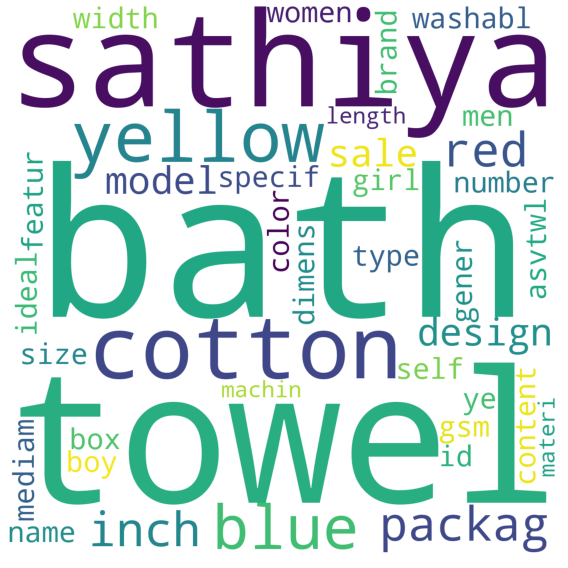

In [56]:
# Finally lets plot the wordcloud.
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

wordcloud = WordCloud(width = 1200, height = 1200, background_color="white",min_font_size =10).generate_from_frequencies(dfBoW_TF_IDF_gram_1.sum())


fig = plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout() 
  
plt.show()
fig.savefig(dirDATA + '3-WordCloud.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')

## LDA

In [57]:
dfLDA = dfBoW_TF_IDF_gram_1.drop(['product_category_tree_0'], axis=1)

In [58]:
from sklearn.decomposition import LatentDirichletAllocation
 # Créer le modèle LDA
lda = LatentDirichletAllocation(n_components=5,max_iter=5,learning_method='online',learning_offset=50.,random_state=0)

In [59]:
# Fitter sur les données
lda.fit(dfLDA)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, n_components=5, random_state=0)

In [60]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):

        print("Topic {}:".format(topic_idx))

        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 5
display_topics(lda, Xtrain_S_E.columns, no_top_words)

Topic 0:
com flipkart product ship day
Topic 1:
com flipkart ship product replac
Topic 2:
flipkart com ship product rs
Topic 3:
com flipkart ship product genuin
Topic 4:
flipkart com ship product deliveri


## NMF

In [61]:
from sklearn.decomposition import NMF
# Run NMF
nmf = NMF(n_components=5, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd')
nmf.fit(dfLDA)

no_top_words = 5
display_topics(nmf, Xtrain_S_E.columns, no_top_words)

Topic 0:
com flipkart product ship free
Topic 1:
box materi set watch onlin
Topic 2:
box materi set watch onlin
Topic 3:
box materi set watch onlin
Topic 4:
box materi set watch onlin


/home/chispitas/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


# Export to CSV

In [62]:
dfDATA_Clean[['image','product_category_tree_0']]

image  \
uniq_id                                                                  
55b85ea15a1536d46b7190ad6fff8ce7  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
7b72c92c2f6c40268628ec5f14c6d590  7b72c92c2f6c40268628ec5f14c6d590.jpg   
d4684dcdc759dd9cdf41504698d737d8  d4684dcdc759dd9cdf41504698d737d8.jpg   
6325b6870c54cd47be6ebfbffa620ec7  6325b6870c54cd47be6ebfbffa620ec7.jpg   
893aa5ed55f7cff2eccea7758d7a86bd  893aa5ed55f7cff2eccea7758d7a86bd.jpg   
...                                                                ...   
be0f39341d771aac57084970f1ed6425  be0f39341d771aac57084970f1ed6425.jpg   
958f54f4c46b53c8a0a9b8167d9140bc  958f54f4c46b53c8a0a9b8167d9140bc.jpg   
fd6cbcc22efb6b761bd564c28928483c  fd6cbcc22efb6b761bd564c28928483c.jpg   
5912e037d12774bb73a2048f35a00009  5912e037d12774bb73a2048f35a00009.jpg   
c3edc504d1b4f0ba6224fa53a43a7ad6  c3edc504d1b4f0ba6224fa53a43a7ad6.jpg   

                                 product_category_tree_0  
uniq_id                                                   
55b85ea15a1536d46b7190ad6fff8ce7         home furnishing  
7b72c92c2f6c40268628ec5f14c6d590               baby care  
d4684dcdc759dd9cdf41504698d737d8         home furnishing  
6325b6870c54cd47be6ebfbffa620ec7         home furnishing  
893aa5ed55f7cff2eccea7758d7a86bd                 watches  
...                                                  ...  
be0f39341d771aac57084970f1ed6425               baby care  
958f54f4c46b53c8a0a9b8167d9140bc               baby care  
fd6cbcc22efb6b761bd564c28928483c               baby care  
5912e037d12774bb73a2048f35a00009               baby care  
c3edc504d1b4f0ba6224fa53a43a7ad6               baby care  

[864 rows x 2 columns]

In [63]:
dfDATA_Clean[['image','product_category_tree_0']].to_csv(dirDATA + 'dfDATA_Clean.csv', index=True,  encoding='utf-8')

In [64]:
test = pd.read_csv(dirDATA+'dfDATA_Clean.csv', encoding='utf-8', index_col=0) #, delimiter='\t', lineterminator="\n", 
test

image  \
uniq_id                                                                  
55b85ea15a1536d46b7190ad6fff8ce7  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
7b72c92c2f6c40268628ec5f14c6d590  7b72c92c2f6c40268628ec5f14c6d590.jpg   
d4684dcdc759dd9cdf41504698d737d8  d4684dcdc759dd9cdf41504698d737d8.jpg   
6325b6870c54cd47be6ebfbffa620ec7  6325b6870c54cd47be6ebfbffa620ec7.jpg   
893aa5ed55f7cff2eccea7758d7a86bd  893aa5ed55f7cff2eccea7758d7a86bd.jpg   
...                                                                ...   
be0f39341d771aac57084970f1ed6425  be0f39341d771aac57084970f1ed6425.jpg   
958f54f4c46b53c8a0a9b8167d9140bc  958f54f4c46b53c8a0a9b8167d9140bc.jpg   
fd6cbcc22efb6b761bd564c28928483c  fd6cbcc22efb6b761bd564c28928483c.jpg   
5912e037d12774bb73a2048f35a00009  5912e037d12774bb73a2048f35a00009.jpg   
c3edc504d1b4f0ba6224fa53a43a7ad6  c3edc504d1b4f0ba6224fa53a43a7ad6.jpg   

                                 product_category_tree_0  
uniq_id                                                   
55b85ea15a1536d46b7190ad6fff8ce7         home furnishing  
7b72c92c2f6c40268628ec5f14c6d590               baby care  
d4684dcdc759dd9cdf41504698d737d8         home furnishing  
6325b6870c54cd47be6ebfbffa620ec7         home furnishing  
893aa5ed55f7cff2eccea7758d7a86bd                 watches  
...                                                  ...  
be0f39341d771aac57084970f1ed6425               baby care  
958f54f4c46b53c8a0a9b8167d9140bc               baby care  
fd6cbcc22efb6b761bd564c28928483c               baby care  
5912e037d12774bb73a2048f35a00009               baby care  
c3edc504d1b4f0ba6224fa53a43a7ad6               baby care  

[864 rows x 2 columns]